In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import random
from shapely.geometry import Point, MultiPoint
import time
from datetime import datetime
import seaborn as sns
pd.set_option('display.max_rows', 100)

In [2]:
sp_shp = gpd.read_file('C:/Users/Ricardo/Documents/R-Projetos/Exploratory-Data-Analysis-Bancarization/data/processed/sp_pop_shp/sp_pop_shp.shp')

In [5]:
sp_shp

CLASSID     FEATID  REVISIONNU           NOME_DIST SIGLA_DIST  COD_DIST  \
0       4.0  8583485.0         1.0      JOSE BONIFACIO        JBO        47   
1       4.0  8583484.0         1.0         JD SAO LUIS        JDS        46   
2       4.0  8583445.0         1.0         ARTUR ALVIM        AAL         5   
3       4.0  8583479.0         1.0             JAGUARA        JAG        40   
4       4.0  8583437.0         1.0       VILA PRUDENTE        VPR        93   
5       4.0  8583480.0         1.0             JAGUARE        JRE        41   
6       4.0  8583481.0         1.0             JARAGUA        JAR        42   
7       4.0  8583482.0         1.0           JD HELENA        JDH        44   
8       4.0  8583483.0         1.0         JD PAULISTA        JDP        45   
9       4.0  8583486.0         1.0             LAJEADO        LAJ        96   
10      4.0  8583487.0         1.0                LAPA        LAP        48   
11      4.0  8583488.0         1.0           LIBERDADE        LIB        49   
12      4.0  8583489.0         1.0               LIMAO        LIM        50   
13      4.0  8583436.0         1.0       VILA MEDEIROS        VMD        92   
14      4.0  8583438.0         1.0           JD ANGELA        JDA        43   
15      4.0  8583439.0         1.0         PARELHEIROS        PLH        55   
16      4.0  8583440.0         1.0          VILA SONIA        VSO        94   
17      4.0  8583441.0         1.0           AGUA RASA        ARA         1   
18      4.0  8583442.0         1.0   ALTO DE PINHEIROS        API         2   
19      4.0  8583443.0         1.0          ANHANGUERA        ANH         3   
20      4.0  8583444.0         1.0          ARICANDUVA        ARI         4   
21      4.0  8583446.0         1.0         BARRA FUNDA        BFU         6   
22      4.0  8583447.0         1.0          BELA VISTA        BVI         7   
23      4.0  8583448.0         1.0               BELEM        BEL         8   
24      4.0  8583449.0         1.0          BOM RETIRO        BRE         9   
25      4.0  8583450.0         1.0                BRAS        BRS        10   
26      4.0  8583451.0         1.0         BRASILANDIA        BRL        11   
27      4.0  8583452.0         1.0             BUTANTA        BUT        12   
28      4.0  8583453.0         1.0        CACHOEIRINHA        CAC        13   
29      4.0  8583454.0         1.0             CAMBUCI        CMB        14   
30      4.0  8583455.0         1.0          CAMPO BELO        CBE        15   
31      4.0  8583456.0         1.0        CAMPO GRANDE        CGR        16   
32      4.0  8583457.0         1.0         CAMPO LIMPO        CLM        17   
33      4.0  8583458.0         1.0            CANGAIBA        CNG        18   
34      4.0  8583459.0         1.0       CAPAO REDONDO        CRE        19   
35      4.0  8583460.0         1.0              CARRAO        CAR        20   
36      4.0  8583461.0         1.0          CASA VERDE        CVE        21   
37      4.0  8583462.0         1.0          CID ADEMAR        CAD        22   
38      4.0  8583463.0         1.0           CID DUTRA        CDU        23   
39      4.0  8583464.0         1.0           CID LIDER        CLD        24   
40      4.0  8583465.0         1.0      CID TIRADENTES        CTI        25   
41      4.0  8583466.0         1.0          CONSOLACAO        CON        26   
42      4.0  8583467.0         1.0             CURSINO        CUR        27   
43      4.0  8583468.0         1.0  ERMELINO MATARAZZO        ERM        28   
44      4.0  8583469.0         1.0      FREGUESIA DO O        FRE        29   
45      4.0  8583470.0         1.0              GRAJAU        GRA        30   
46      4.0  8583471.0         1.0          GUAIANASES        GUA        31   
47      4.0  8583472.0         1.0            IGUATEMI        IGU        33   
48      4.0  8583473.0         1.0            IPIRANGA        IPI        34   
49      4.0  8583474.0         1.0          ITAIM BIBI

In [35]:
sp_shp.pop_maio_1.sum() * 0.692

6173179.76

In [39]:
# Create an empty dataframe
pop_simulated = pd.DataFrame()

# For each district, generate a lat long based on pop
for index, row in sp_shp.iterrows():
    pointsx = []
    pointsy = []
    minx, miny, maxx, maxy = row["geometry"].bounds
    while len(pointsx) < row['pop_maio_1']*0.01:
        x = random.uniform(minx, maxx)
        y = random.uniform(miny, maxy)
        pnt = Point(x, y)
        if row["geometry"].contains(pnt):
            pointsx.append(x)
            pointsy.append(y)
    df = pd.DataFrame(
        {'x': pointsx, 'y': pointsy}
    ) 
    pop_simulated = pop_simulated.append(df)

In [40]:
pop_simulated

x             y
0    353962.710883  7.395480e+06
1    352872.633666  7.395153e+06
2    353267.475656  7.395194e+06
3    353895.163047  7.394515e+06
4    353226.410239  7.392869e+06
..             ...           ...
496  332307.083495  7.395544e+06
497  332829.616921  7.394367e+06
498  332601.511219  7.394364e+06
499  332345.972841  7.394343e+06
500  332241.359736  7.394874e+06

[89258 rows x 2 columns]

In [ ]:
gdf = gpd.GeoDataFrame(pop_simulated, geometry=gpd.points_from_xy(pop_simulated.x, pop_simulated.y), crs=sp_shp.crs)
print(gdf)

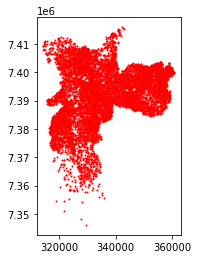

In [9]:
gdf.plot(marker='o', color='red', markersize=1);

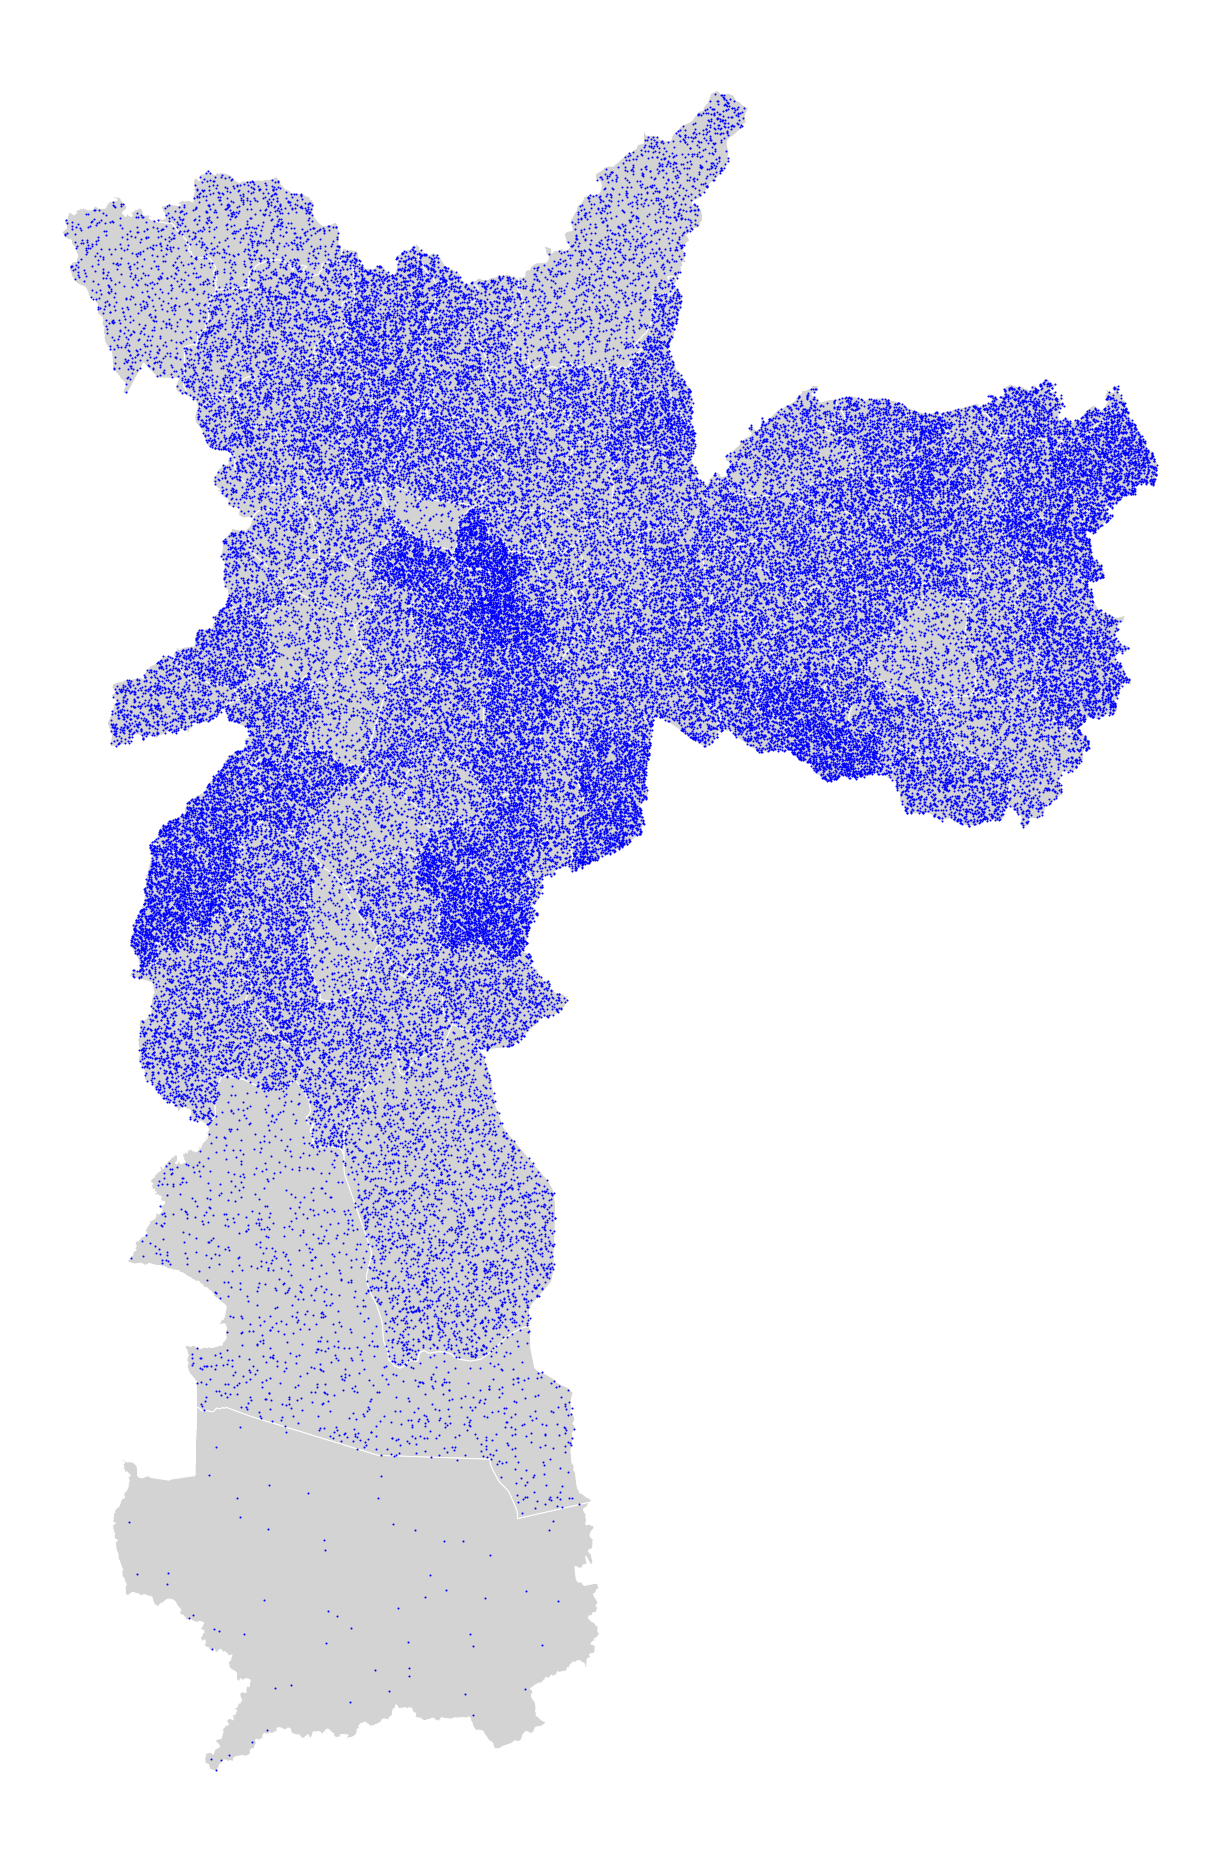

In [42]:
fig, ax = plt.subplots(figsize=(40,34))

# Set bg colors
ax.set(facecolor = "white")
fig.patch.set_facecolor('white')

# Plot polygons
sp_shp.plot(ax=ax, facecolor='lightgrey', edgecolor="white")

# Plot points
gdf.plot(ax=ax, color='blue', markersize=1)

ax.axis("off")
plt.show()

In [3]:
gdf_agencias_sp = pd.read_csv('C:/Users/Ricardo/Documents/R-Projetos/Exploratory-Data-Analysis-Bancarization/data/processed/agencias_latlong.csv', sep=';')

In [4]:
# Set crs to use degrees in the first moment
# https://gis.stackexchange.com/questions/345071/matching-x-and-y-axis-coordinates-of-two-geopandas-geometries-to-overlay-them
gdf_agencias_sp_points = gpd.GeoDataFrame(gdf_agencias_sp, geometry=gpd.points_from_xy(gdf_agencias_sp['lon'], gdf_agencias_sp['lat']), crs=4326)

In [7]:
sp_shp.crs

{'init': 'epsg:29193'}

In [5]:
# Then, set the crs of points to the crs of shapefile map which is in meters
gdf_agencias_sp_points = gdf_agencias_sp_points.to_crs(sp_shp.crs)

C:\Users\Ricardo\Anaconda3\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [7]:
within_sp = gdf_agencias_sp_points[gdf_agencias_sp_points.geometry.within(sp_shp.geometry.unary_union)]

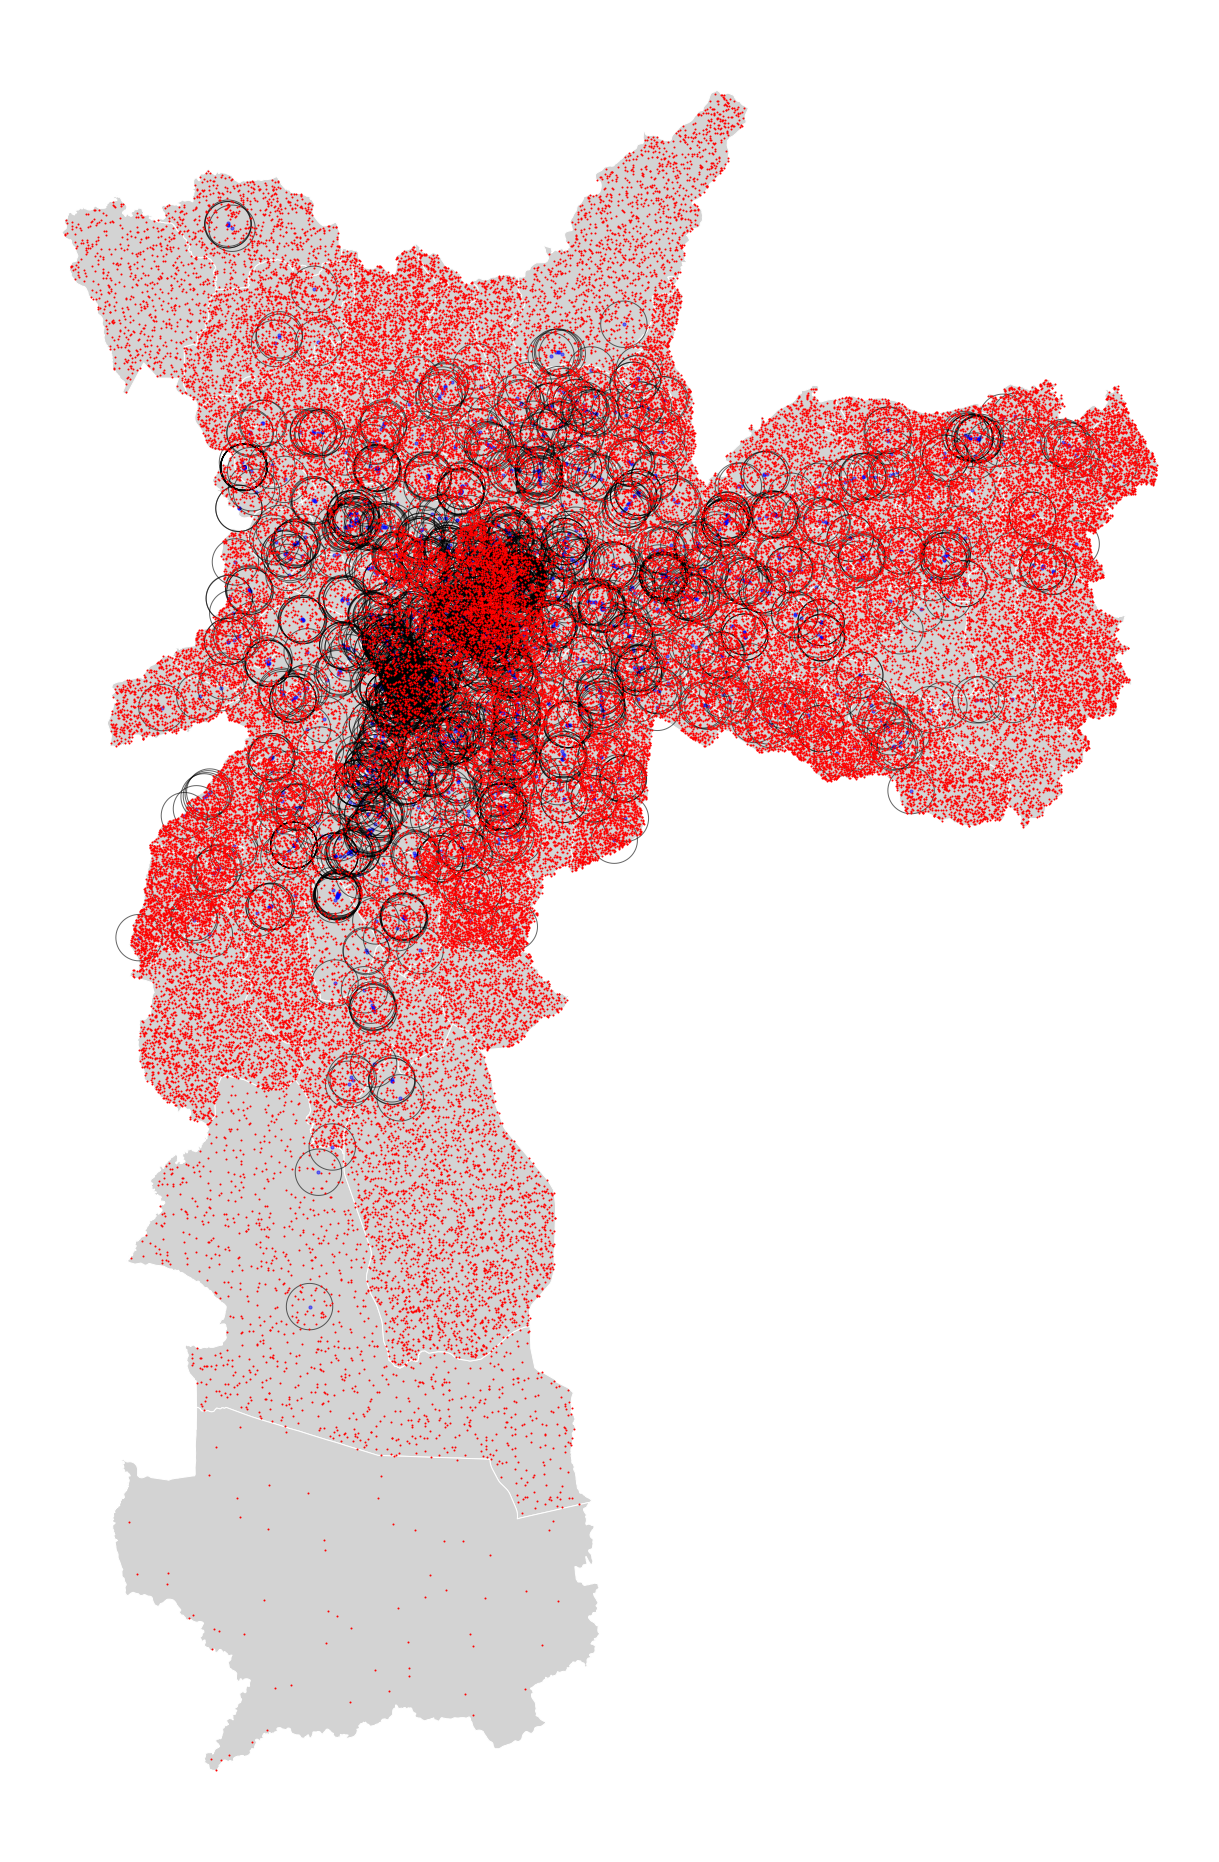

In [43]:
fig, ax = plt.subplots(figsize=(40,34))

# Set bg colors
ax.set(facecolor = "white")
fig.patch.set_facecolor('white')

# Plot polygons
sp_shp.plot(ax=ax, facecolor='lightgrey', edgecolor="white")

# Plot points
within_sp.plot(ax=ax, color='blue', markersize=10, alpha=0.5)
within_sp.geometry.buffer(1000).plot(ax=ax, alpha=0.6, edgecolor='black', facecolor='none')
gdf.plot(ax=ax, color='red', markersize=1)

ax.axis("off")
plt.show()

In [27]:
#within_sp.geometry.buffer(1000).unary_union
sp_shp.columns

Index(['CLASSID', 'FEATID', 'REVISIONNU', 'NOME_DIST', 'SIGLA_DIST',
       'COD_DIST', 'COD_SUB', 'DATA_CRIAC', 'USUARIO_ID', 'distrito_x',
       'pop_maior_', 'distrito_y', 'pop_maio_1', 'geometry'],
      dtype='object')

In [44]:
# Create an empty dataframe
result = pd.DataFrame()

for index, row in sp_shp.iterrows():
    # Getting pop inside district
    within_district = gdf[gdf.geometry.within(row.geometry)]
    
    # Getting agencies inside district
    within_agencies = within_sp[within_sp.geometry.within(row.geometry)]
    
    # Getting pop inside buffer
    within_pop = within_district[within_district.geometry.within(within_agencies.geometry.buffer(1000).unary_union)]
    #print(within_district.shape[0], within_pop.shape[0])

    df = pd.DataFrame(
        {'pop_total': within_district.shape[0], 'pop_buffer': within_pop.shape[0], 'nome_distrito':row.NOME_DIST, 'cod_distrito':row.COD_DIST}, index=[0]
    ) 
    result = result.append(df)
    

In [45]:
result['perc_atendimento'] = result.pop_buffer/result.pop_total

In [46]:
result

pop_total  pop_buffer       nome_distrito  cod_distrito  perc_atendimento
0       1025         103      JOSE BONIFACIO            47          0.100488
0       2151         828         JD SAO LUIS            46          0.384937
0        771         358         ARTUR ALVIM             5          0.464332
0        187         113             JAGUARA            40          0.604278
0        828         722       VILA PRUDENTE            93          0.871981
0        417         307             JAGUARE            41          0.736211
0       1543         470             JARAGUA            42          0.304601
0        954         366           JD HELENA            44          0.383648
0        758         758         JD PAULISTA            45          1.000000
0       1236         356             LAJEADO            96          0.288026
0        544         524                LAPA            48          0.963235
0        587         587           LIBERDADE            49          1.000000
0        596         512               LIMAO            50          0.859060
0        931         751       VILA MEDEIROS            92          0.806660
0       2377         176           JD ANGELA            43          0.074043
0       1073          60         PARELHEIROS            55          0.055918
0        925         452          VILA SONIA            94          0.488649
0        655         608           AGUA RASA             1          0.928244
0        342         245   ALTO DE PINHEIROS             2          0.716374
0        623           0          ANHANGUERA             3          0.000000
0        663         388          ARICANDUVA             4          0.585219
0        128         128         BARRA FUNDA             6          1.000000
0        598         598          BELA VISTA             7          1.000000
0        364         272               BELEM             8          0.747253
0        289         287          BOM RETIRO             9          0.993080
0        243         243                BRAS            10          1.000000
0       1984         424         BRASILANDIA            11          0.213710
0        438         371             BUTANTA            12          0.847032
0       1056         446        CACHOEIRINHA            13          0.422348
0        315         312             CAMBUCI            14          0.990476
0        510         505          CAMPO BELO            15          0.990196
0        839         687        CAMPO GRANDE            16          0.818832
0       1678         564         CAMPO LIMPO            17          0.336114
0       1035         256            CANGAIBA            18          0.247343
0       2140        1492       CAPAO REDONDO            19          0.697196
0        678         562              CARRAO            20          0.828909
0        658         636          CASA VERDE            21          0.966565
0       2087        1759          CID ADEMAR            22          0.842837
0       1510         474           CID DUTRA            23          0.313907
0       1009         214           CID LIDER            24          0.212091
0       1668           0      CID TIRADENTES            25          0.000000
0        493         492          CONSOLACAO            26          0.997972
0        891         558             CURSINO            27          0.626263
0        877         555  ERMELINO MATARAZZO            28          0.632839
0       1078         788      FREGUESIA DO O            29          0.730983
0       2764         110              GRAJAU            30          0.039797
0        782         230          GUAIANASES            31          0.294118
0       1060         273            IGUATEMI            33          0.257547
0        880         694            IPIRANGA            34          0.788636
0        796         796          ITAIM BIBI            35          1.000000
0       1689         966      ITAIM PAULISTA            36          0.571936

In [47]:
sp_shp_agg = sp_shp.merge(result, how='left',left_on='COD_DIST', right_on='cod_distrito')

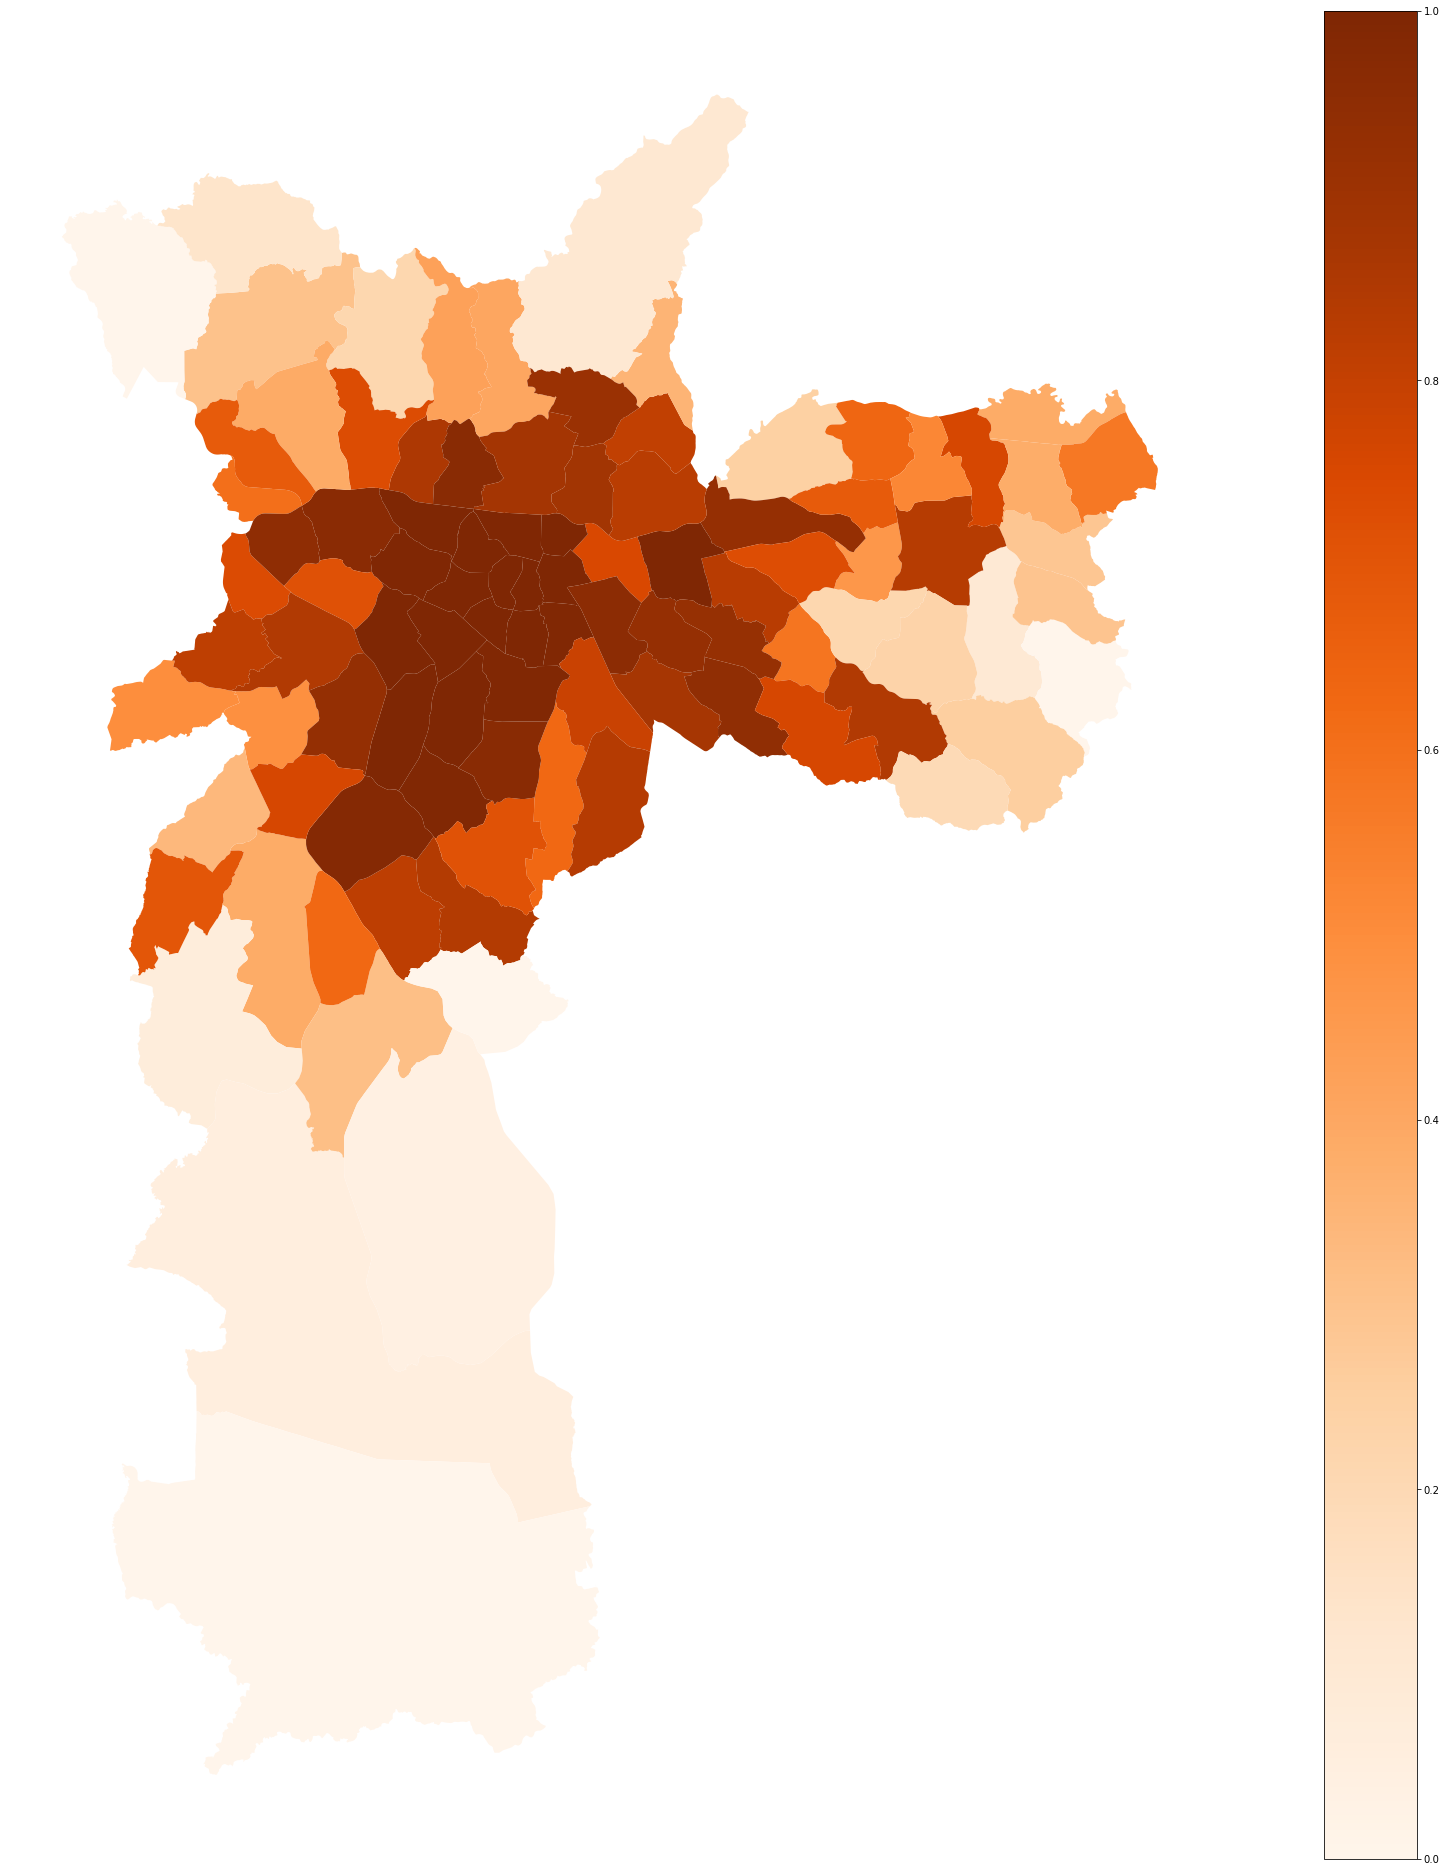

In [48]:
fig, ax = plt.subplots(figsize=(40,34))

# Set bg colors
ax.set(facecolor = "white")
fig.patch.set_facecolor('white')

# Plot
sp_shp_agg.plot(column='perc_atendimento', cmap="Oranges", legend=True, ax=ax)

ax.axis("off")
plt.show()

# Simulation

## Population: 0.1% 
## Buffer: 500

In [9]:
start_time = time.time()

# Create an empty dataframe
result_sim_1 = pd.DataFrame()
    
for i in range(10):
    print(i)
    # Create an empty dataframe
    pop_simulated = pd.DataFrame()

    # For each district, generate a lat long based on pop
    for index, row in sp_shp.iterrows():
        pointsx = []
        pointsy = []
        minx, miny, maxx, maxy = row["geometry"].bounds
        while len(pointsx) < row['pop_maio_1']*0.001:
            x = random.uniform(minx, maxx)
            y = random.uniform(miny, maxy)
            pnt = Point(x, y)
            if row["geometry"].contains(pnt):
                pointsx.append(x)
                pointsy.append(y)
        df = pd.DataFrame(
            {'x': pointsx, 'y': pointsy}
        ) 
        pop_simulated = pop_simulated.append(df)

    gdf = gpd.GeoDataFrame(pop_simulated, geometry=gpd.points_from_xy(pop_simulated.x, pop_simulated.y), crs=sp_shp.crs)

    

    for index, row in sp_shp.iterrows():
        # Getting pop inside district
        within_district = gdf[gdf.geometry.within(row.geometry)]

        # Getting agencies inside district
        within_agencies = within_sp[within_sp.geometry.within(row.geometry)]

        # Getting pop inside buffer
        within_pop = within_district[within_district.geometry.within(within_agencies.geometry.buffer(500).unary_union)]
        #print(within_district.shape[0], within_pop.shape[0])

        df = pd.DataFrame(
            {'simulacao': 'simulacao_'+str(i), 'pop_total': within_district.shape[0], 'pop_buffer': within_pop.shape[0], 'perc_atendimento': within_pop.shape[0]/within_district.shape[0], 'nome_distrito':row.NOME_DIST, 'cod_distrito':row.COD_DIST}, index=[0]
        ) 
        result_sim_1 = result_sim_1.append(df)
        
print("--- %s seconds ---" % (time.time() - start_time))

0
1
2
3
4
5
6
7
8
9
--- 173.4703290462494 seconds ---


In [10]:
result_sim_1

simulacao  pop_total  pop_buffer  perc_atendimento   nome_distrito  \
0   simulacao_0        103           5          0.048544  JOSE BONIFACIO   
0   simulacao_0        216          26          0.120370     JD SAO LUIS   
0   simulacao_0         78          19          0.243590     ARTUR ALVIM   
0   simulacao_0         19           5          0.263158         JAGUARA   
0   simulacao_0         83          40          0.481928   VILA PRUDENTE   
..          ...        ...         ...               ...             ...   
0   simulacao_9         85          32          0.376471      VILA MARIA   
0   simulacao_9        110          85          0.772727    VILA MARIANA   
0   simulacao_9         83          29          0.349398    VILA MATILDE   
0   simulacao_9         72          71          0.986111   SANTA CECILIA   
0   simulacao_9         51          51          1.000000       REPUBLICA   

    cod_distrito  
0             47  
0             46  
0              5  
0             40  
0             93  
..           ...  
0             89  
0             90  
0             91  
0             69  
0             66  

[960 rows x 6 columns]

<AxesSubplot:xlabel='simulacao', ylabel='nome_distrito'>

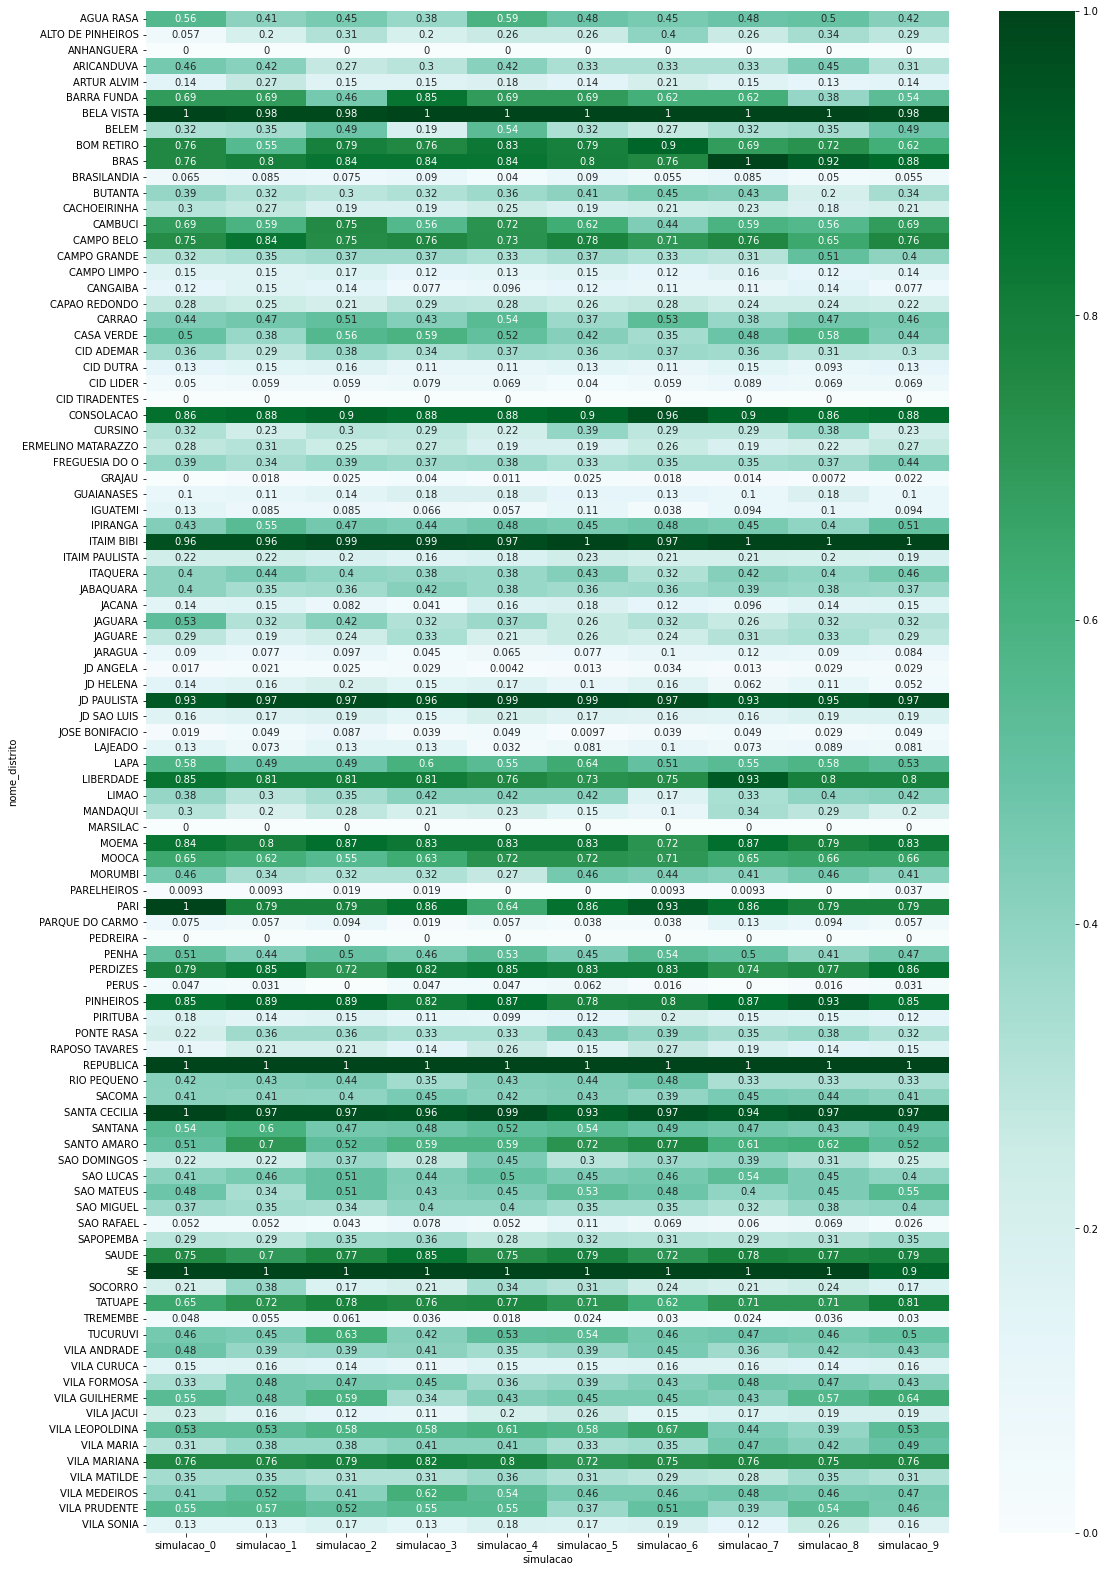

In [16]:
heatmap = result_sim_1[['simulacao', 'perc_atendimento', 'nome_distrito']].pivot(index='nome_distrito', columns='simulacao')['perc_atendimento']
fig,ax = plt.subplots(1,1,figsize=(18,28))
sns.heatmap(heatmap, cmap="BuGn", annot=True, ax=ax)

## Population: 0.1% 
## Buffer: 1000

In [17]:
start_time = time.time()

# Create an empty dataframe
result_sim_2 = pd.DataFrame()
    
for i in range(10):
    print(i)
    # Create an empty dataframe
    pop_simulated = pd.DataFrame()

    # For each district, generate a lat long based on pop
    for index, row in sp_shp.iterrows():
        pointsx = []
        pointsy = []
        minx, miny, maxx, maxy = row["geometry"].bounds
        while len(pointsx) < row['pop_maio_1']*0.001:
            x = random.uniform(minx, maxx)
            y = random.uniform(miny, maxy)
            pnt = Point(x, y)
            if row["geometry"].contains(pnt):
                pointsx.append(x)
                pointsy.append(y)
        df = pd.DataFrame(
            {'x': pointsx, 'y': pointsy}
        ) 
        pop_simulated = pop_simulated.append(df)

    gdf = gpd.GeoDataFrame(pop_simulated, geometry=gpd.points_from_xy(pop_simulated.x, pop_simulated.y), crs=sp_shp.crs)

    

    for index, row in sp_shp.iterrows():
        # Getting pop inside district
        within_district = gdf[gdf.geometry.within(row.geometry)]

        # Getting agencies inside district
        within_agencies = within_sp[within_sp.geometry.within(row.geometry)]

        # Getting pop inside buffer
        within_pop = within_district[within_district.geometry.within(within_agencies.geometry.buffer(1000).unary_union)]
        #print(within_district.shape[0], within_pop.shape[0])

        df = pd.DataFrame(
            {'simulacao': 'simulacao_'+str(i), 'pop_total': within_district.shape[0], 'pop_buffer': within_pop.shape[0], 'perc_atendimento': within_pop.shape[0]/within_district.shape[0], 'nome_distrito':row.NOME_DIST, 'cod_distrito':row.COD_DIST}, index=[0]
        ) 
        result_sim_2 = result_sim_2.append(df)
        
print("--- %s seconds ---" % (time.time() - start_time))

0
1
2
3
4
5
6
7
8
9
--- 281.0042383670807 seconds ---


In [18]:
result_sim_2

simulacao  pop_total  pop_buffer  perc_atendimento   nome_distrito  \
0   simulacao_0        103          15          0.145631  JOSE BONIFACIO   
0   simulacao_0        216          89          0.412037     JD SAO LUIS   
0   simulacao_0         78          34          0.435897     ARTUR ALVIM   
0   simulacao_0         19          11          0.578947         JAGUARA   
0   simulacao_0         83          74          0.891566   VILA PRUDENTE   
..          ...        ...         ...               ...             ...   
0   simulacao_9         85          69          0.811765      VILA MARIA   
0   simulacao_9        110         109          0.990909    VILA MARIANA   
0   simulacao_9         83          54          0.650602    VILA MATILDE   
0   simulacao_9         72          72          1.000000   SANTA CECILIA   
0   simulacao_9         51          51          1.000000       REPUBLICA   

    cod_distrito  
0             47  
0             46  
0              5  
0             40  
0             93  
..           ...  
0             89  
0             90  
0             91  
0             69  
0             66  

[960 rows x 6 columns]

<AxesSubplot:xlabel='simulacao', ylabel='nome_distrito'>

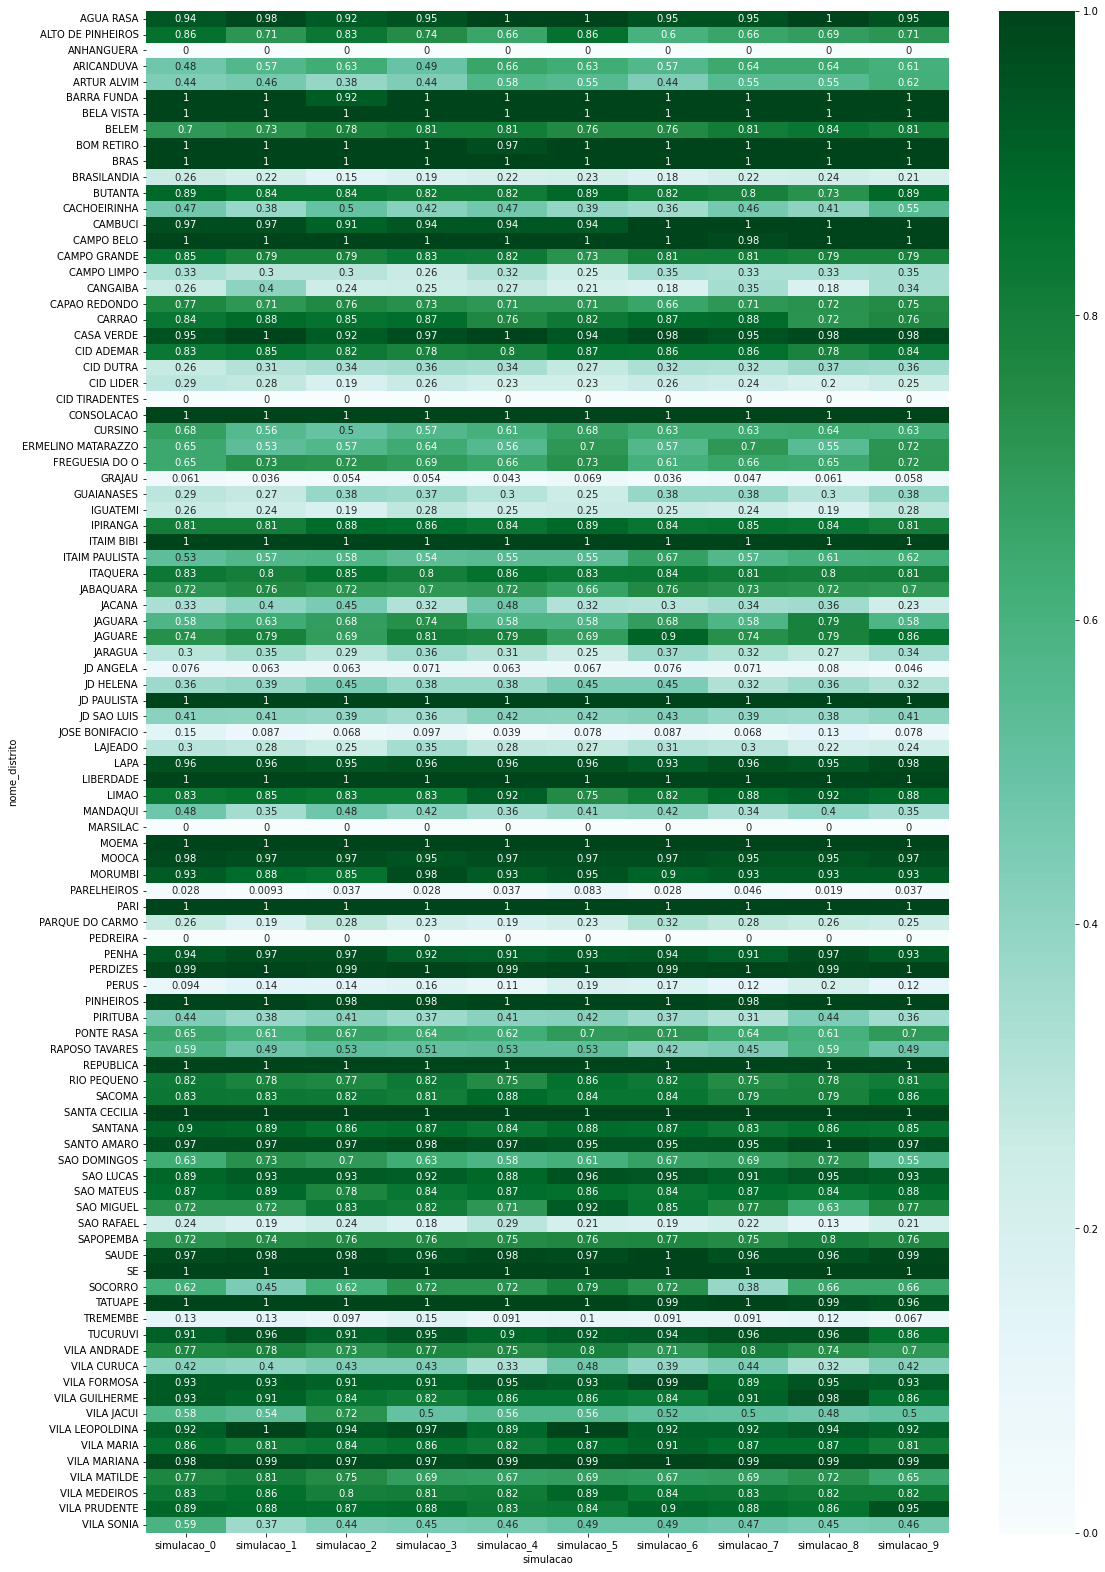

In [19]:
heatmap = result_sim_2[['simulacao', 'perc_atendimento', 'nome_distrito']].pivot(index='nome_distrito', columns='simulacao')['perc_atendimento']
fig,ax = plt.subplots(1,1,figsize=(18,28))
sns.heatmap(heatmap, cmap="BuGn", annot=True, ax=ax)

## Population: 1% 
## Buffer: 500

In [21]:
start_time = time.time()

# Create an empty dataframe
result_sim_3 = pd.DataFrame()
    
for i in range(10):
    print(i)
    # Create an empty dataframe
    pop_simulated = pd.DataFrame()

    # For each district, generate a lat long based on pop
    for index, row in sp_shp.iterrows():
        pointsx = []
        pointsy = []
        minx, miny, maxx, maxy = row["geometry"].bounds
        while len(pointsx) < row['pop_maio_1']*0.01:
            x = random.uniform(minx, maxx)
            y = random.uniform(miny, maxy)
            pnt = Point(x, y)
            if row["geometry"].contains(pnt):
                pointsx.append(x)
                pointsy.append(y)
        df = pd.DataFrame(
            {'x': pointsx, 'y': pointsy}
        ) 
        pop_simulated = pop_simulated.append(df)

    gdf = gpd.GeoDataFrame(pop_simulated, geometry=gpd.points_from_xy(pop_simulated.x, pop_simulated.y), crs=sp_shp.crs)

    

    for index, row in sp_shp.iterrows():
        # Getting pop inside district
        within_district = gdf[gdf.geometry.within(row.geometry)]

        # Getting agencies inside district
        within_agencies = within_sp[within_sp.geometry.within(row.geometry)]

        # Getting pop inside buffer
        within_pop = within_district[within_district.geometry.within(within_agencies.geometry.buffer(500).unary_union)]
        #print(within_district.shape[0], within_pop.shape[0])

        df = pd.DataFrame(
            {'simulacao': 'simulacao_'+str(i), 'pop_total': within_district.shape[0], 'pop_buffer': within_pop.shape[0], 'perc_atendimento': within_pop.shape[0]/within_district.shape[0], 'nome_distrito':row.NOME_DIST, 'cod_distrito':row.COD_DIST}, index=[0]
        ) 
        result_sim_3 = result_sim_3.append(df)
        
print("--- %s seconds ---" % (time.time() - start_time))

0
1
2
3
4
5
6
7
8
9
--- 1424.349776506424 seconds ---


In [22]:
result_sim_3

simulacao  pop_total  pop_buffer  perc_atendimento   nome_distrito  \
0   simulacao_0       1025          42          0.040976  JOSE BONIFACIO   
0   simulacao_0       2151         349          0.162250     JD SAO LUIS   
0   simulacao_0        771         145          0.188067     ARTUR ALVIM   
0   simulacao_0        187          58          0.310160         JAGUARA   
0   simulacao_0        828         399          0.481884   VILA PRUDENTE   
..          ...        ...         ...               ...             ...   
0   simulacao_9        841         331          0.393579      VILA MARIA   
0   simulacao_9       1100         841          0.764545    VILA MARIANA   
0   simulacao_9        823         265          0.321993    VILA MATILDE   
0   simulacao_9        717         687          0.958159   SANTA CECILIA   
0   simulacao_9        501         501          1.000000       REPUBLICA   

    cod_distrito  
0             47  
0             46  
0              5  
0             40  
0             93  
..           ...  
0             89  
0             90  
0             91  
0             69  
0             66  

[960 rows x 6 columns]

<AxesSubplot:xlabel='simulacao', ylabel='nome_distrito'>

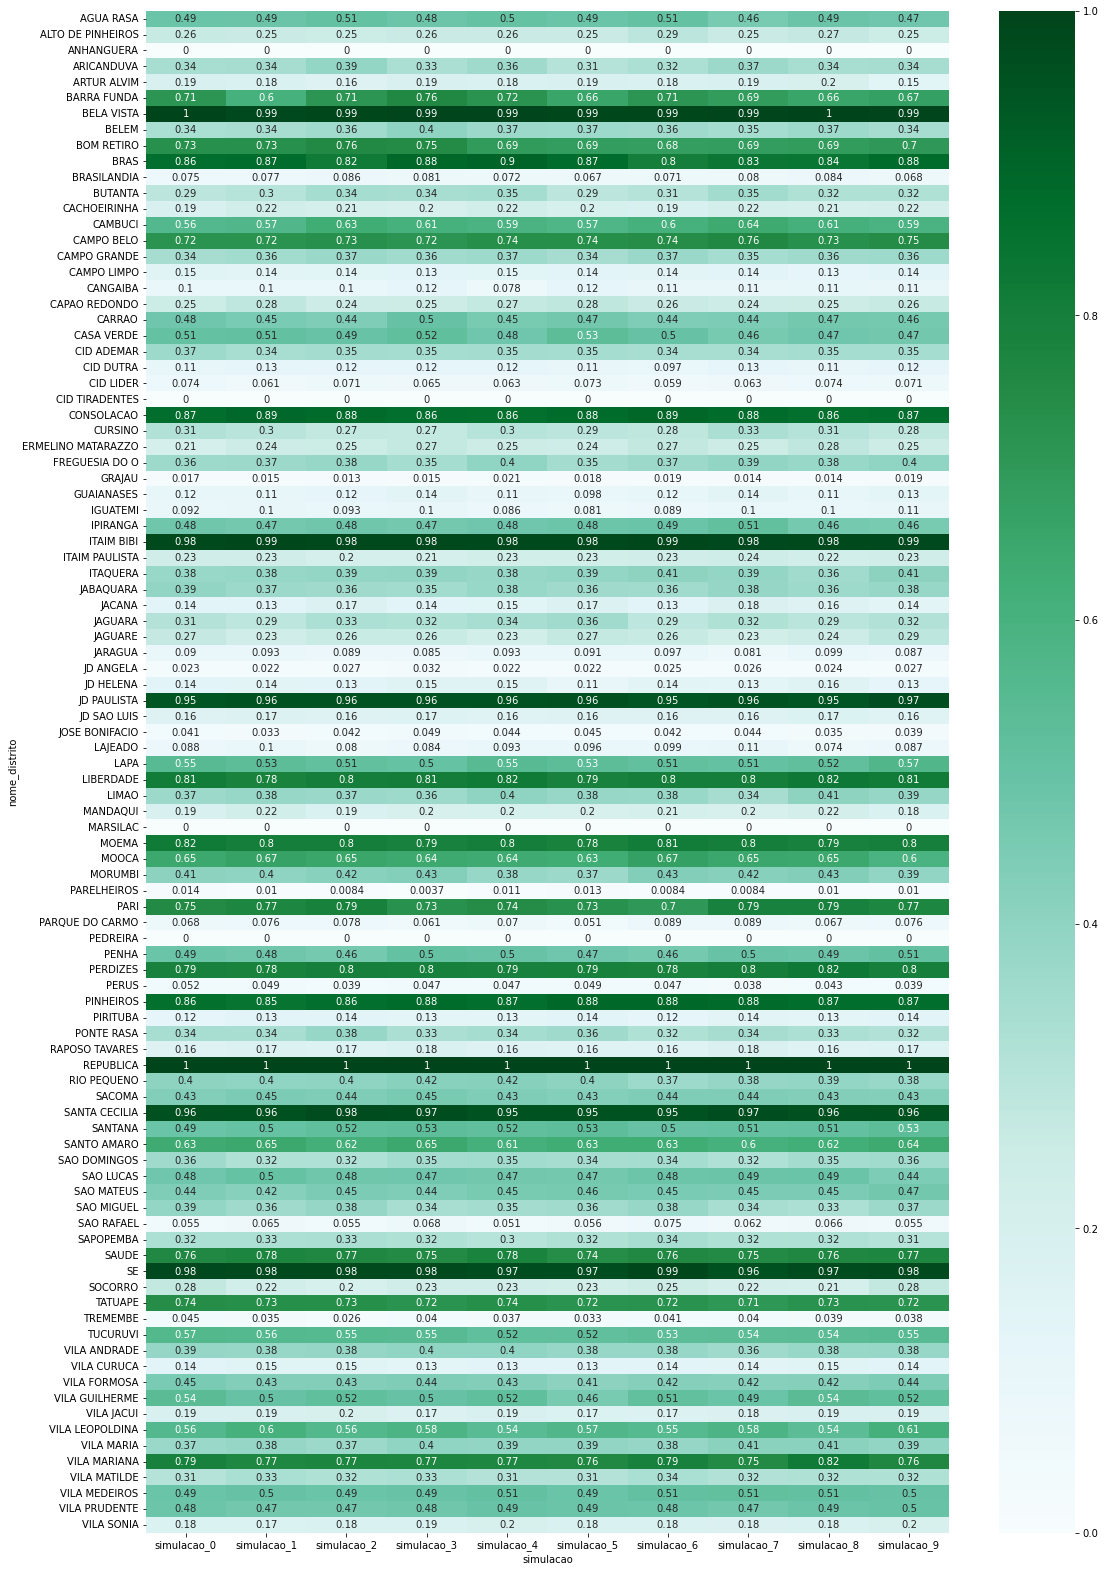

In [23]:
heatmap = result_sim_3[['simulacao', 'perc_atendimento', 'nome_distrito']].pivot(index='nome_distrito', columns='simulacao')['perc_atendimento']
fig,ax = plt.subplots(1,1,figsize=(18,28))
sns.heatmap(heatmap, cmap="BuGn", annot=True, ax=ax)

## Population: 1% 
## Buffer: 1000

In [24]:
start_time = time.time()

# Create an empty dataframe
result_sim_4 = pd.DataFrame()
    
for i in range(10):
    print(i)
    # Create an empty dataframe
    pop_simulated = pd.DataFrame()

    # For each district, generate a lat long based on pop
    for index, row in sp_shp.iterrows():
        pointsx = []
        pointsy = []
        minx, miny, maxx, maxy = row["geometry"].bounds
        while len(pointsx) < row['pop_maio_1']*0.01:
            x = random.uniform(minx, maxx)
            y = random.uniform(miny, maxy)
            pnt = Point(x, y)
            if row["geometry"].contains(pnt):
                pointsx.append(x)
                pointsy.append(y)
        df = pd.DataFrame(
            {'x': pointsx, 'y': pointsy}
        ) 
        pop_simulated = pop_simulated.append(df)

    gdf = gpd.GeoDataFrame(pop_simulated, geometry=gpd.points_from_xy(pop_simulated.x, pop_simulated.y), crs=sp_shp.crs)

    

    for index, row in sp_shp.iterrows():
        # Getting pop inside district
        within_district = gdf[gdf.geometry.within(row.geometry)]

        # Getting agencies inside district
        within_agencies = within_sp[within_sp.geometry.within(row.geometry)]

        # Getting pop inside buffer
        within_pop = within_district[within_district.geometry.within(within_agencies.geometry.buffer(1000).unary_union)]
        #print(within_district.shape[0], within_pop.shape[0])

        df = pd.DataFrame(
            {'simulacao': 'simulacao_'+str(i), 'pop_total': within_district.shape[0], 'pop_buffer': within_pop.shape[0], 'perc_atendimento': within_pop.shape[0]/within_district.shape[0], 'nome_distrito':row.NOME_DIST, 'cod_distrito':row.COD_DIST}, index=[0]
        ) 
        result_sim_4 = result_sim_4.append(df)
        
print("--- %s seconds ---" % (time.time() - start_time))

0
1
2
3
4
5
6
7
8
9
--- 1442.6892981529236 seconds ---


In [25]:
result_sim_4

simulacao  pop_total  pop_buffer  perc_atendimento   nome_distrito  \
0   simulacao_0       1025         115          0.112195  JOSE BONIFACIO   
0   simulacao_0       2151         835          0.388192     JD SAO LUIS   
0   simulacao_0        771         382          0.495460     ARTUR ALVIM   
0   simulacao_0        187         123          0.657754         JAGUARA   
0   simulacao_0        828         732          0.884058   VILA PRUDENTE   
..          ...        ...         ...               ...             ...   
0   simulacao_9        841         719          0.854935      VILA MARIA   
0   simulacao_9       1100        1089          0.990000    VILA MARIANA   
0   simulacao_9        823         579          0.703524    VILA MATILDE   
0   simulacao_9        717         717          1.000000   SANTA CECILIA   
0   simulacao_9        501         501          1.000000       REPUBLICA   

    cod_distrito  
0             47  
0             46  
0              5  
0             40  
0             93  
..           ...  
0             89  
0             90  
0             91  
0             69  
0             66  

[960 rows x 6 columns]

<AxesSubplot:xlabel='simulacao', ylabel='nome_distrito'>

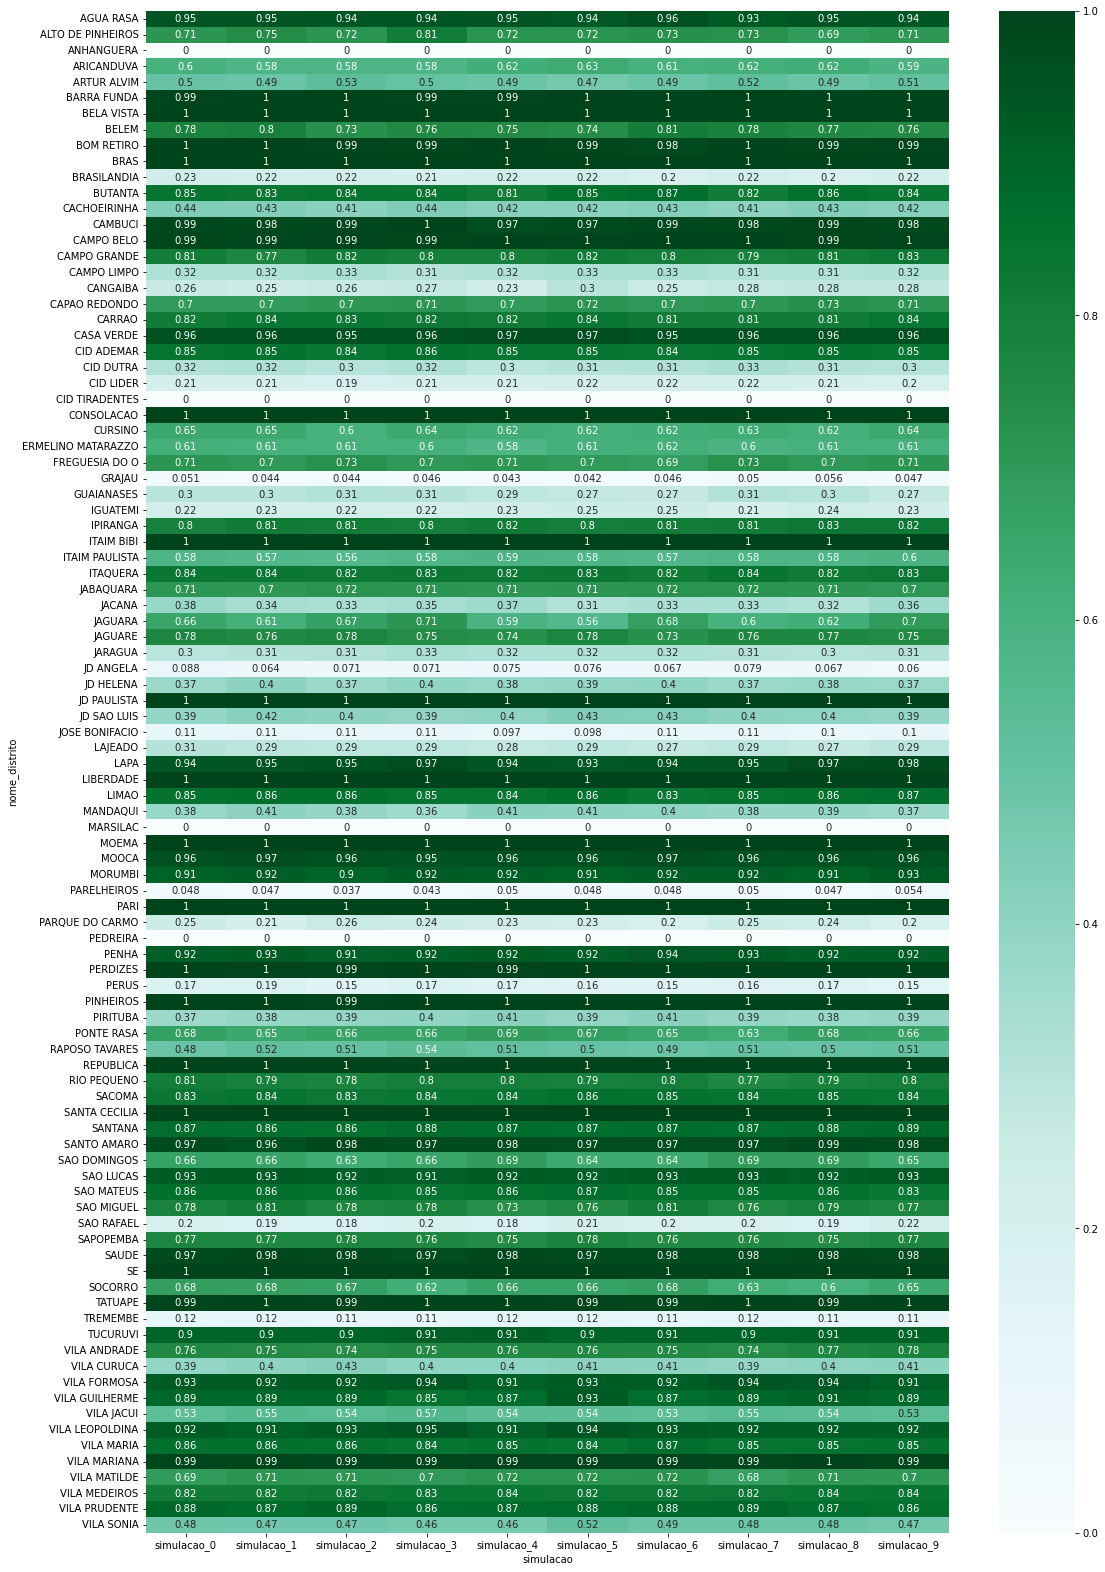

In [26]:
heatmap = result_sim_4[['simulacao', 'perc_atendimento', 'nome_distrito']].pivot(index='nome_distrito', columns='simulacao')['perc_atendimento']
fig,ax = plt.subplots(1,1,figsize=(18,28))
sns.heatmap(heatmap, cmap="BuGn", annot=True, ax=ax)

## Population: 10% 
## Buffer: 500

In [27]:
start_time = time.time()

# Create an empty dataframe
result_sim_5 = pd.DataFrame()
    
for i in range(10):
    print(i)
    # Create an empty dataframe
    pop_simulated = pd.DataFrame()

    # For each district, generate a lat long based on pop
    for index, row in sp_shp.iterrows():
        pointsx = []
        pointsy = []
        minx, miny, maxx, maxy = row["geometry"].bounds
        while len(pointsx) < row['pop_maio_1']*0.1:
            x = random.uniform(minx, maxx)
            y = random.uniform(miny, maxy)
            pnt = Point(x, y)
            if row["geometry"].contains(pnt):
                pointsx.append(x)
                pointsy.append(y)
        df = pd.DataFrame(
            {'x': pointsx, 'y': pointsy}
        ) 
        pop_simulated = pop_simulated.append(df)

    gdf = gpd.GeoDataFrame(pop_simulated, geometry=gpd.points_from_xy(pop_simulated.x, pop_simulated.y), crs=sp_shp.crs)

    

    for index, row in sp_shp.iterrows():
        # Getting pop inside district
        within_district = gdf[gdf.geometry.within(row.geometry)]

        # Getting agencies inside district
        within_agencies = within_sp[within_sp.geometry.within(row.geometry)]

        # Getting pop inside buffer
        within_pop = within_district[within_district.geometry.within(within_agencies.geometry.buffer(500).unary_union)]
        #print(within_district.shape[0], within_pop.shape[0])

        df = pd.DataFrame(
            {'simulacao': 'simulacao_'+str(i), 'pop_total': within_district.shape[0], 'pop_buffer': within_pop.shape[0], 'perc_atendimento': within_pop.shape[0]/within_district.shape[0], 'nome_distrito':row.NOME_DIST, 'cod_distrito':row.COD_DIST}, index=[0]
        ) 
        result_sim_5 = result_sim_5.append(df)
        
print("--- %s seconds ---" % (time.time() - start_time))

0
1
2
3
4
5
6
7
8
9
--- 16334.243123054504 seconds ---


In [28]:
result_sim_5

simulacao  pop_total  pop_buffer  perc_atendimento   nome_distrito  \
0   simulacao_0      10249         402          0.039223  JOSE BONIFACIO   
0   simulacao_0      21503        3459          0.160861     JD SAO LUIS   
0   simulacao_0       7701        1394          0.181015     ARTUR ALVIM   
0   simulacao_0       1870         609          0.325668         JAGUARA   
0   simulacao_0       8273        3972          0.480116   VILA PRUDENTE   
..          ...        ...         ...               ...             ...   
0   simulacao_9       8402        3301          0.392883      VILA MARIA   
0   simulacao_9      10991        8557          0.778546    VILA MARIANA   
0   simulacao_9       8224        2539          0.308731    VILA MATILDE   
0   simulacao_9       7165        6875          0.959525   SANTA CECILIA   
0   simulacao_9       5002        5002          1.000000       REPUBLICA   

    cod_distrito  
0             47  
0             46  
0              5  
0             40  
0             93  
..           ...  
0             89  
0             90  
0             91  
0             69  
0             66  

[960 rows x 6 columns]

<AxesSubplot:xlabel='simulacao', ylabel='nome_distrito'>

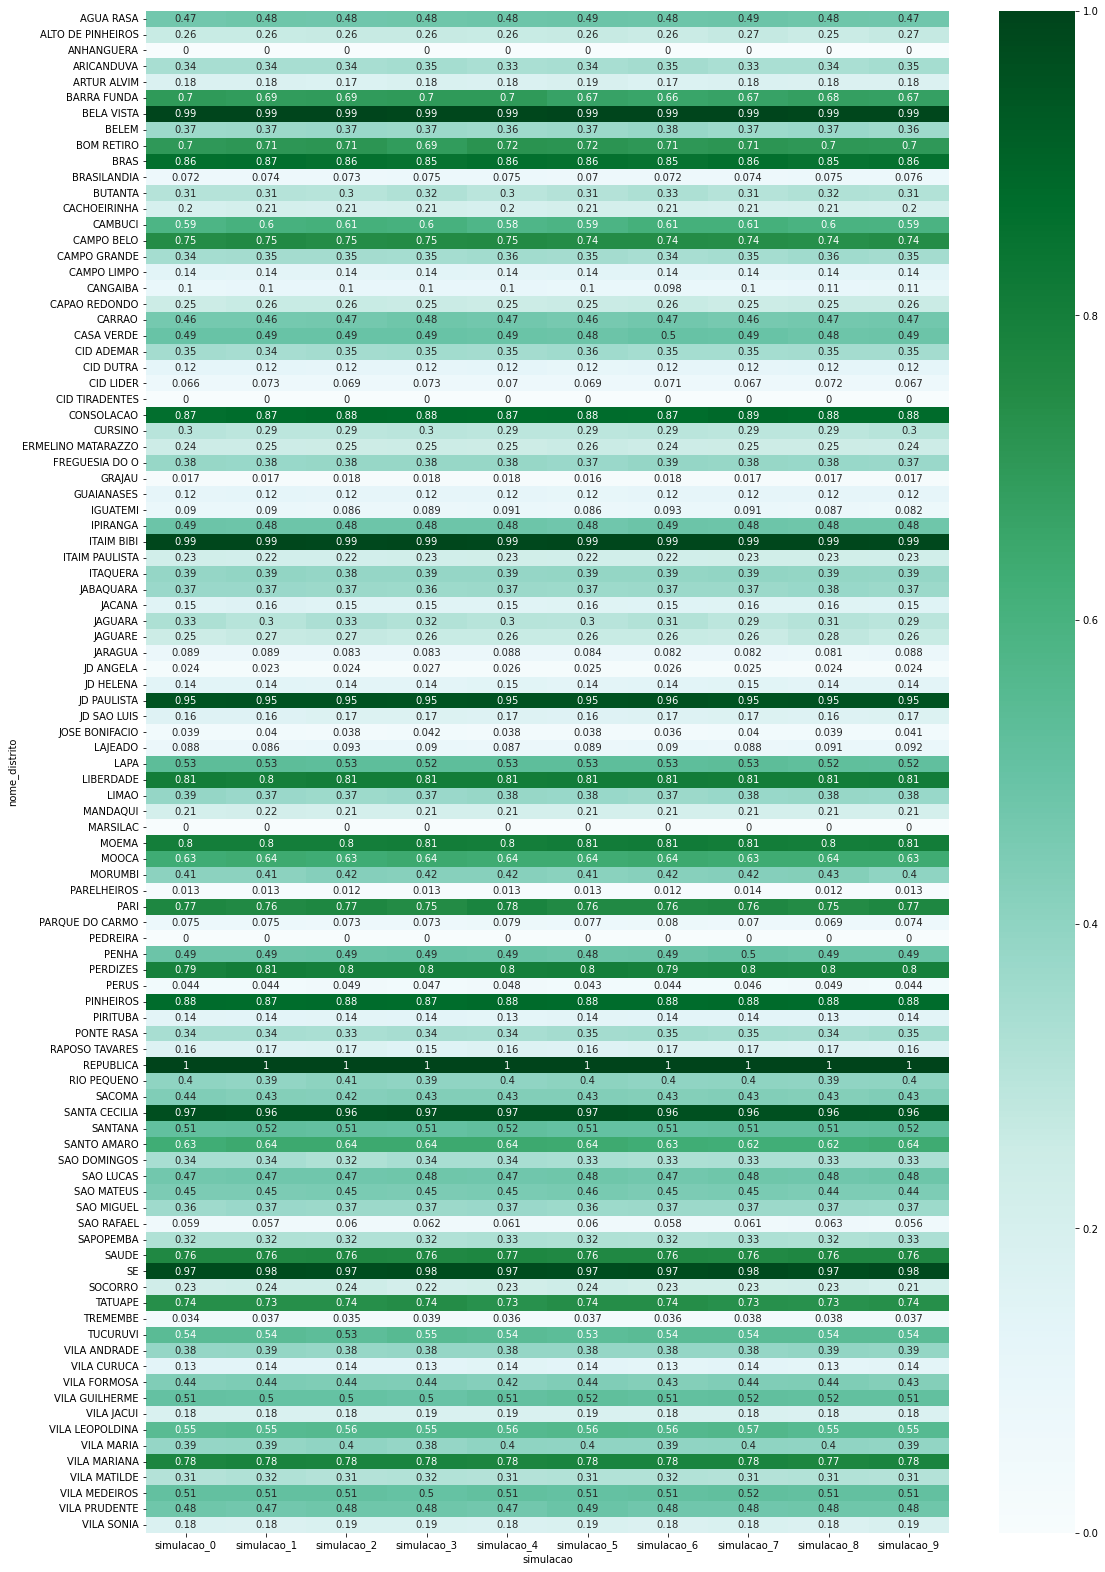

In [29]:
heatmap = result_sim_5[['simulacao', 'perc_atendimento', 'nome_distrito']].pivot(index='nome_distrito', columns='simulacao')['perc_atendimento']
fig,ax = plt.subplots(1,1,figsize=(18,28))
sns.heatmap(heatmap, cmap="BuGn", annot=True, ax=ax)

## Population: 69,2% 
## Buffer: 500

In [28]:
print("--- Start Time: %s ---" %datetime.now().strftime('%d/%m/%Y %H:%M'))
start_time = time.time()

# Create an empty dataframe
result_sim_6 = pd.DataFrame()
    
# Create an empty dataframe
pop_simulated = pd.DataFrame()

# For each district, generate a lat long based on pop
for index, row in sp_shp.iterrows():
    pointsx = []
    pointsy = []
    minx, miny, maxx, maxy = row["geometry"].bounds
    while len(pointsx) < row['pop_maio_1']*0.692:
        x = random.uniform(minx, maxx)
        y = random.uniform(miny, maxy)
        pnt = Point(x, y)
        if row["geometry"].contains(pnt):
            pointsx.append(x)
            pointsy.append(y)
    df = pd.DataFrame(
        {'x': pointsx, 'y': pointsy}
    ) 
    pop_simulated = pop_simulated.append(df)

gdf = gpd.GeoDataFrame(pop_simulated, geometry=gpd.points_from_xy(pop_simulated.x, pop_simulated.y), crs=sp_shp.crs)

for index, row in sp_shp.iterrows():
    # Getting pop inside district
    within_district = gdf[gdf.geometry.within(row.geometry)]

    # Getting agencies inside district
    within_agencies = within_sp[within_sp.geometry.within(row.geometry)]

    # Getting pop inside buffer
    within_pop = within_district[within_district.geometry.within(within_agencies.geometry.buffer(500).unary_union)]
    #print(within_district.shape[0], within_pop.shape[0])

    df = pd.DataFrame(
        {'simulacao': 'simulacao_6', 'pop_total': within_district.shape[0], 'pop_buffer': within_pop.shape[0], 'perc_atendimento': within_pop.shape[0]/within_district.shape[0], 'nome_distrito':row.NOME_DIST, 'cod_distrito':row.COD_DIST}, index=[index]
    ) 
    result_sim_6 = result_sim_6.append(df)
        
print("--- %s seconds ---" % (time.time() - start_time))
print("--- End Time: %s ---" %datetime.now().strftime('%d/%m/%Y %H:%M'))

--- Start Time: 20/02/2022 11:18 ---
--- 9526.20542216301 seconds ---
--- End Time: 20/02/2022 13:57 ---


In [29]:
result_sim_6

simulacao  pop_total  pop_buffer  perc_atendimento       nome_distrito  \
0   simulacao_6      70923        2859          0.040311      JOSE BONIFACIO   
1   simulacao_6     148795       24329          0.163507         JD SAO LUIS   
2   simulacao_6      53289        9662          0.181313         ARTUR ALVIM   
3   simulacao_6      12937        3973          0.307104             JAGUARA   
4   simulacao_6      57243       27407          0.478783       VILA PRUDENTE   
5   simulacao_6      28845        7597          0.263373             JAGUARE   
6   simulacao_6     106715        9252          0.086698             JARAGUA   
7   simulacao_6      65985        9152          0.138698           JD HELENA   
8   simulacao_6      52431       49965          0.952967         JD PAULISTA   
9   simulacao_6      85466        7591          0.088819             LAJEADO   
10  simulacao_6      37636       19882          0.528271                LAPA   
11  simulacao_6      40595       32707          0.805690           LIBERDADE   
12  simulacao_6      41208       15335          0.372136               LIMAO   
13  simulacao_6      64396       32634          0.506771       VILA MEDEIROS   
14  simulacao_6     164446        4111          0.024999           JD ANGELA   
15  simulacao_6      74193         962          0.012966         PARELHEIROS   
16  simulacao_6      63979       11767          0.183920          VILA SONIA   
17  simulacao_6      45297       21687          0.478773           AGUA RASA   
18  simulacao_6      23607        6057          0.256576   ALTO DE PINHEIROS   
19  simulacao_6      43082           0          0.000000          ANHANGUERA   
20  simulacao_6      45832       15439          0.336861          ARICANDUVA   
21  simulacao_6       8811        6054          0.687096         BARRA FUNDA   
22  simulacao_6      41378       41057          0.992242          BELA VISTA   
23  simulacao_6      25126        9475          0.377099               BELEM   
24  simulacao_6      19956       14309          0.717027          BOM RETIRO   
25  simulacao_6      16810       14437          0.858834                BRAS   
26  simulacao_6     137272       10221          0.074458         BRASILANDIA   
27  simulacao_6      30266        9359          0.309225             BUTANTA   
28  simulacao_6      73074       15117          0.206872        CACHOEIRINHA   
29  simulacao_6      21749       12906          0.593407             CAMBUCI   
30  simulacao_6      35261       26218          0.743541          CAMPO BELO   
31  simulacao_6      58047       20311          0.349906        CAMPO GRANDE   
32  simulacao_6     116079       16441          0.141636         CAMPO LIMPO   
33  simulacao_6      71558        7546          0.105453            CANGAIBA   
34  simulacao_6     148086       38011          0.256682       CAPAO REDONDO   
35  simulacao_6      46910       22145          0.472074              CARRAO   
36  simulacao_6      45522       22191          0.487479          CASA VERDE   
37  simulacao_6     144359       50606          0.350557          CID ADEMAR   
38  simulacao_6     104426       12581          0.120478           CID DUTRA   
39  simulacao_6      69814        4826          0.069127           CID LIDER   
40  simulacao_6     115371           0          0.000000      CID TIRADENTES   
41  simulacao_6      34088       29792          0.873973          CONSOLACAO   
42  simulacao_6      61633       18098          0.293641             CURSINO   
43  simulacao_6      60670       15176          0.250140  ERMELINO MATARAZZO   
44  simulacao_6      74568       28027          0.375858      FREGUESIA DO O   
45  simulacao_6     191219        3261          0.017054              GRAJAU   
46  simulacao_6      54067        6627          0.122570          GUAIANASES   
47  simulacao_6      73335        6646          0.090625            IGUATEMI   
48  simulacao_6      60885       29294          0.481137            IPIRANGA   
49  si

<AxesSubplot:xlabel='simulacao', ylabel='nome_distrito'>

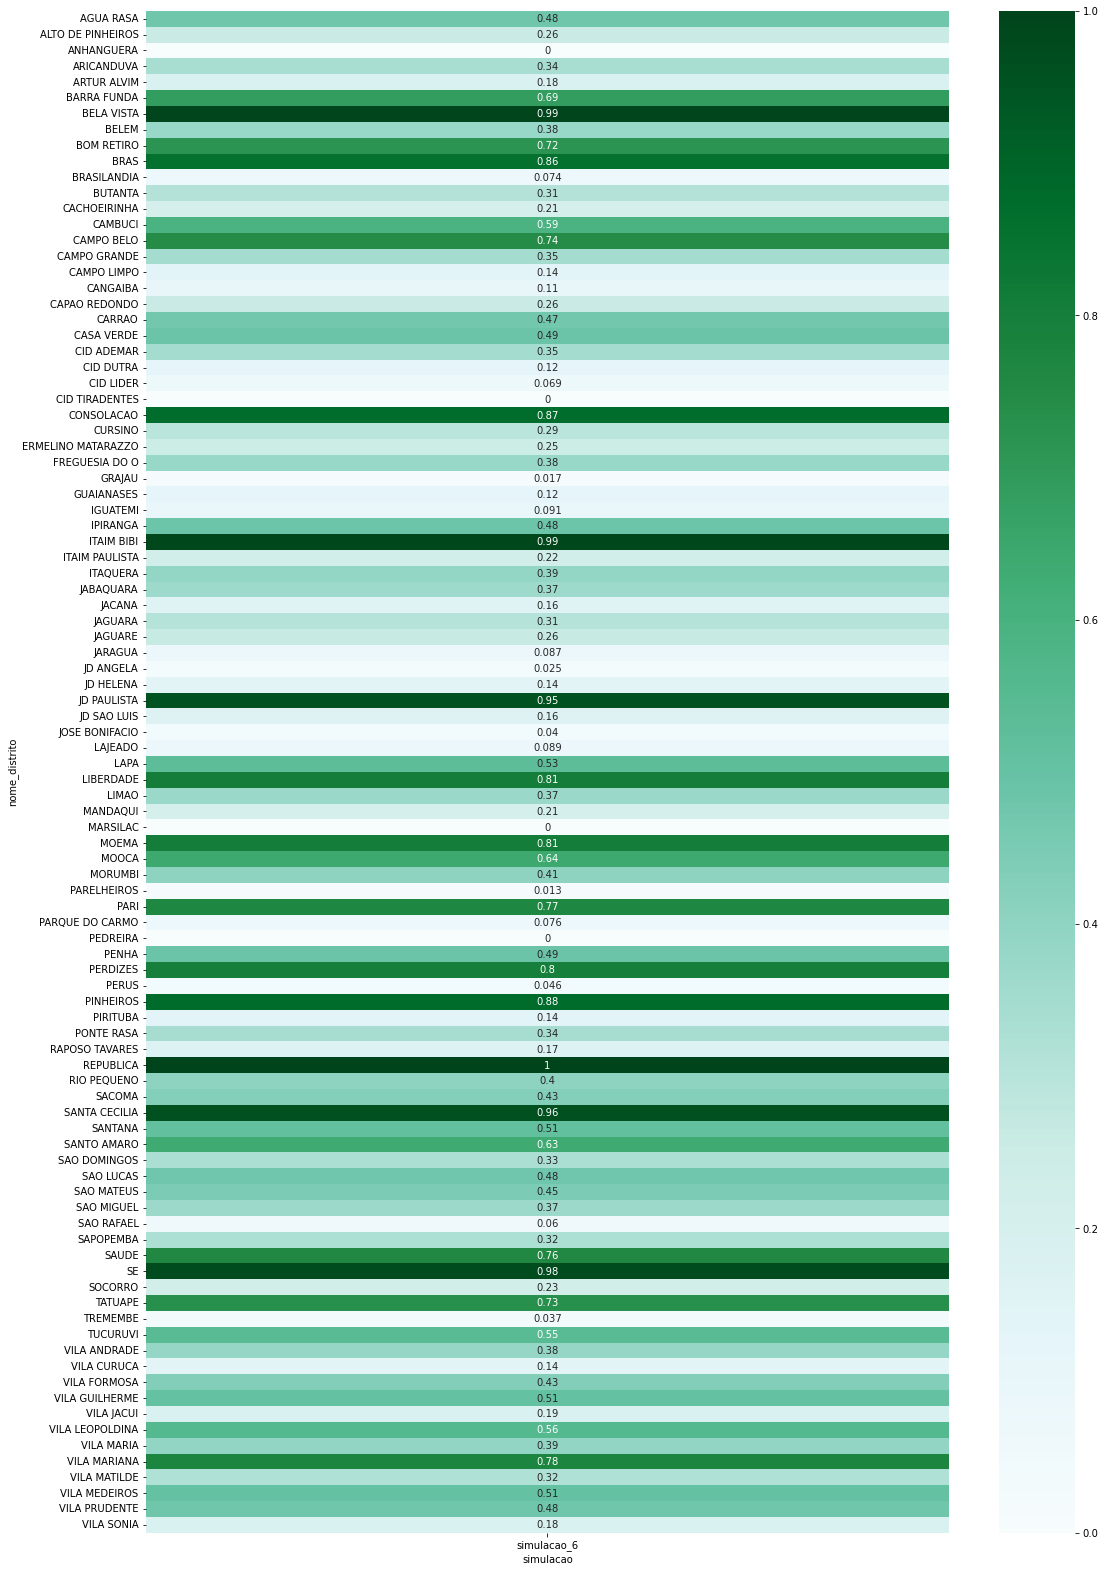

In [30]:
heatmap = result_sim_6[['simulacao', 'perc_atendimento', 'nome_distrito']].pivot(index='nome_distrito', columns='simulacao')['perc_atendimento']
fig,ax = plt.subplots(1,1,figsize=(18,28))
sns.heatmap(heatmap, cmap="BuGn", annot=True, ax=ax)

In [32]:
gdf.shape

(6173227, 3)

In [33]:
gdf.to_file("C:/Users/Ricardo/Documents/R-Projetos/Exploratory-Data-Analysis-Bancarization/data/processed/sp_pop_simulated_69%/sp_pop_simulated_69%.shp")

## Population: 69,2% 
## Buffer: 1000

In [ ]:
gdf = gpd.read_file('C:/Users/Ricardo/Documents/R-Projetos/Exploratory-Data-Analysis-Bancarization/data/processed/sp_pop_simulated_69%/sp_pop_simulated_69%.shp')

In [36]:
print("--- Start Time: %s ---" %datetime.now().strftime('%d/%m/%Y %H:%M'))
start_time = time.time()

# Create an empty dataframe
result_sim_7 = pd.DataFrame()
    
# Create an empty dataframe
pop_simulated = pd.DataFrame()

# Create an empty dataframe
pop_within_simulated = pd.DataFrame()

# For each district, generate a lat long based on pop
for index, row in sp_shp.iterrows():
    pointsx = []
    pointsy = []
    minx, miny, maxx, maxy = row["geometry"].bounds
    while len(pointsx) < row['pop_maio_1']*0.692:
        x = random.uniform(minx, maxx)
        y = random.uniform(miny, maxy)
        pnt = Point(x, y)
        if row["geometry"].contains(pnt):
            pointsx.append(x)
            pointsy.append(y)
    df = pd.DataFrame(
        {'x': pointsx, 'y': pointsy}
    ) 
    pop_simulated = pop_simulated.append(df)

gdf = gpd.GeoDataFrame(pop_simulated, geometry=gpd.points_from_xy(pop_simulated.x, pop_simulated.y), crs=sp_shp.crs)

for index, row in sp_shp.iterrows():
    # Getting pop inside district
    within_district = gdf[gdf.geometry.within(row.geometry)]

    # Getting agencies inside district
    within_agencies = within_sp[within_sp.geometry.within(row.geometry)]

    # Getting pop inside buffer
    within_pop = within_district[within_district.geometry.within(within_agencies.geometry.buffer(1000).unary_union)]
    pop_within_simulated = pop_within_simulated.append(within_pop)
    #print(within_district.shape[0], within_pop.shape[0])

    df = pd.DataFrame(
        {'simulacao': 'simulacao_7', 'pop_total': within_district.shape[0], 'pop_buffer': within_pop.shape[0], 'perc_atendimento': within_pop.shape[0]/within_district.shape[0], 'nome_distrito':row.NOME_DIST, 'cod_distrito':row.COD_DIST}, index=[index]
    ) 
    result_sim_7 = result_sim_7.append(df)

gdf_within = gpd.GeoDataFrame(pop_within_simulated, geometry=gpd.points_from_xy(pop_within_simulated.x, pop_within_simulated.y), crs=sp_shp.crs)
print("--- %s seconds ---" % (time.time() - start_time))
print("--- End Time: %s ---" %datetime.now().strftime('%d/%m/%Y %H:%M'))

--- Start Time: 28/02/2022 19:58 ---
--- 9665.367951631546 seconds ---
--- End Time: 28/02/2022 22:39 ---


In [37]:
result_sim_7

simulacao  pop_total  pop_buffer  perc_atendimento       nome_distrito  \
0   simulacao_7      70923        7204          0.101575      JOSE BONIFACIO   
1   simulacao_7     148795       60048          0.403562         JD SAO LUIS   
2   simulacao_7      53289       26223          0.492090         ARTUR ALVIM   
3   simulacao_7      12937        8138          0.629048             JAGUARA   
4   simulacao_7      57243       50040          0.874168       VILA PRUDENTE   
5   simulacao_7      28845       21858          0.757774             JAGUARE   
6   simulacao_7     106715       32939          0.308663             JARAGUA   
7   simulacao_7      65985       25815          0.391225           JD HELENA   
8   simulacao_7      52431       52431          1.000000         JD PAULISTA   
9   simulacao_7      85466       24827          0.290490             LAJEADO   
10  simulacao_7      37636       35976          0.955893                LAPA   
11  simulacao_7      40595       40595          1.000000           LIBERDADE   
12  simulacao_7      41208       35421          0.859566               LIMAO   
13  simulacao_7      64396       52940          0.822101       VILA MEDEIROS   
14  simulacao_7     164446       11892          0.072316           JD ANGELA   
15  simulacao_7      74193        3301          0.044492         PARELHEIROS   
16  simulacao_7      63979       30055          0.469764          VILA SONIA   
17  simulacao_7      45297       42970          0.948628           AGUA RASA   
18  simulacao_7      23607       17275          0.731774   ALTO DE PINHEIROS   
19  simulacao_7      43082           0          0.000000          ANHANGUERA   
20  simulacao_7      45832       27360          0.596963          ARICANDUVA   
21  simulacao_7       8811        8788          0.997390         BARRA FUNDA   
22  simulacao_7      41378       41378          1.000000          BELA VISTA   
23  simulacao_7      25126       19222          0.765024               BELEM   
24  simulacao_7      19956       19794          0.991882          BOM RETIRO   
25  simulacao_7      16810       16810          1.000000                BRAS   
26  simulacao_7     137272       29387          0.214079         BRASILANDIA   
27  simulacao_7      30266       25419          0.839853             BUTANTA   
28  simulacao_7      73074       30846          0.422120        CACHOEIRINHA   
29  simulacao_7      21749       21378          0.982942             CAMBUCI   
30  simulacao_7      35261       35098          0.995377          CAMPO BELO   
31  simulacao_7      58047       46697          0.804469        CAMPO GRANDE   
32  simulacao_7     116079       37702          0.324796         CAMPO LIMPO   
33  simulacao_7      71558       19045          0.266148            CANGAIBA   
34  simulacao_7     148086      105013          0.709135       CAPAO REDONDO   
35  simulacao_7      46910       38524          0.821232              CARRAO   
36  simulacao_7      45522       43974          0.965994          CASA VERDE   
37  simulacao_7     144359      122069          0.845593          CID ADEMAR   
38  simulacao_7     104426       32661          0.312767           CID DUTRA   
39  simulacao_7      69814       15376          0.220242           CID LIDER   
40  simulacao_7     115371           0          0.000000      CID TIRADENTES   
41  simulacao_7      34088       34069          0.999443          CONSOLACAO   
42  simulacao_7      61633       38724          0.628300             CURSINO   
43  simulacao_7      60670       37095          0.611422  ERMELINO MATARAZZO   
44  simulacao_7      74568       52111          0.698839      FREGUESIA DO O   
45  simulacao_7     191219        8814          0.046094              GRAJAU   
46  simulacao_7      54067       15645          0.289363          GUAIANASES   
47  simulacao_7      73335       17269          0.235481            IGUATEMI   
48  simulacao_7      60885       49599          0.814634            IPIRANGA   
49  si

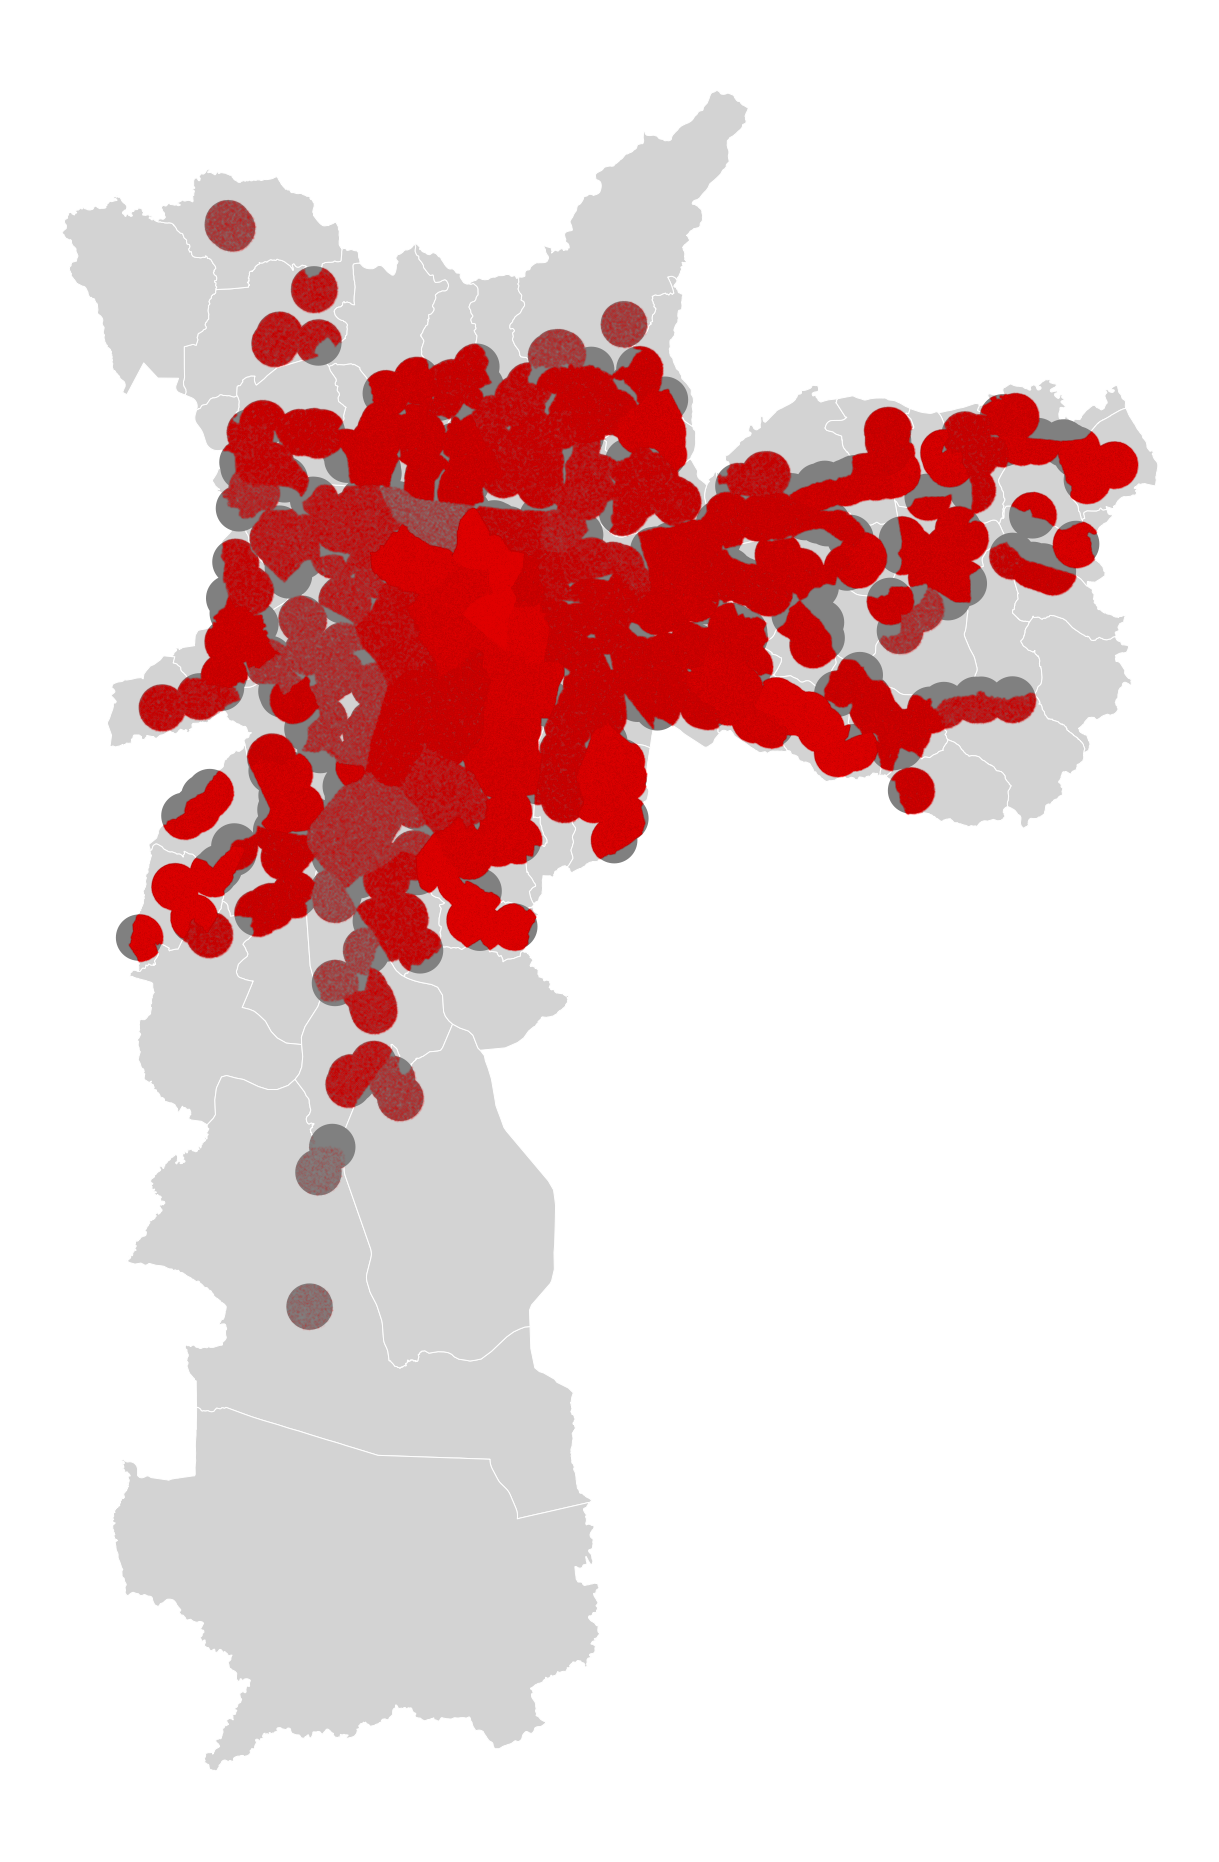

In [43]:
fig, ax = plt.subplots(figsize=(40,34))

# Set bg colors
ax.set(facecolor = "white")
fig.patch.set_facecolor('white')

# Plot polygons
sp_shp.plot(ax=ax, facecolor='lightgrey', edgecolor="white")
new.plot(ax=ax, facecolor='grey')

# Plot points
gdf.plot(ax=ax, color='blue', markersize=10, alpha=0.01)
#within_sp.geometry.buffer(1000).plot(ax=ax, alpha=0.6, edgecolor='black', facecolor='none')
gdf_within.plot(ax=ax, color='red', markersize=1, alpha=0.03)

ax.axis("off")
plt.show()

In [24]:
print("--- Start Time: %s ---" %datetime.now().strftime('%d/%m/%Y %H:%M'))
start_time = time.time()

# Create an empty dataframe
result_sim_7 = pd.DataFrame()
    
# Create an empty dataframe
pop_simulated = pd.DataFrame()

# Create an empty dataframe
pop_within_simulated = pd.DataFrame()

# For each district, generate a lat long based on pop
for index, row in sp_shp.iterrows():
    pointsx = []
    pointsy = []
    minx, miny, maxx, maxy = row["geometry"].bounds
    while len(pointsx) < row['pop_maio_1']*0.001:
        x = random.uniform(minx, maxx)
        y = random.uniform(miny, maxy)
        pnt = Point(x, y)
        if row["geometry"].contains(pnt):
            pointsx.append(x)
            pointsy.append(y)
    df = pd.DataFrame(
        {'x': pointsx, 'y': pointsy}
    ) 
    pop_simulated = pop_simulated.append(df)

gdf = gpd.GeoDataFrame(pop_simulated, geometry=gpd.points_from_xy(pop_simulated.x, pop_simulated.y), crs=sp_shp.crs)

for index, row in sp_shp.iterrows():
    # Getting pop inside district
    within_district = gdf[gdf.geometry.within(row.geometry)]

    # Getting agencies inside district
    within_agencies = within_sp[within_sp.geometry.within(row.geometry)]

    # Getting pop inside buffer
    within_pop = within_district[within_district.geometry.within(within_agencies.geometry.buffer(1000).unary_union)]
    pop_within_simulated = pop_within_simulated.append(within_pop)
    #print(within_district.shape[0], within_pop.shape[0])

    df = pd.DataFrame(
        {'simulacao': 'simulacao_7', 'pop_total': within_district.shape[0], 'pop_buffer': within_pop.shape[0], 'perc_atendimento': within_pop.shape[0]/within_district.shape[0], 'nome_distrito':row.NOME_DIST, 'cod_distrito':row.COD_DIST}, index=[index]
    ) 
    result_sim_7 = result_sim_7.append(df)

gdf_within = gpd.GeoDataFrame(pop_within_simulated, geometry=gpd.points_from_xy(pop_within_simulated.x, pop_within_simulated.y), crs=sp_shp.crs)
print("--- %s seconds ---" % (time.time() - start_time))
print("--- End Time: %s ---" %datetime.now().strftime('%d/%m/%Y %H:%M'))

--- Start Time: 28/02/2022 19:22 ---
--- 18.62414526939392 seconds ---
--- End Time: 28/02/2022 19:22 ---


In [14]:
pop_within_simulated.shape

(5258, 3)

In [23]:
pop_simulated

x             y                        geometry
0   352633.484241  7.393906e+06  POINT (352633.484 7393905.981)
1   353899.918791  7.393284e+06  POINT (353899.919 7393283.751)
2   354739.095477  7.391976e+06  POINT (354739.095 7391976.009)
3   354087.487021  7.393335e+06  POINT (354087.487 7393334.618)
4   353732.284862  7.392273e+06  POINT (353732.285 7392273.155)
..            ...           ...                             ...
46  332290.155067  7.394968e+06  POINT (332290.155 7394968.387)
47  332811.806159  7.396297e+06  POINT (332811.806 7396297.160)
48  332766.340733  7.395810e+06  POINT (332766.341 7395810.234)
49  332198.567439  7.395023e+06  POINT (332198.567 7395022.839)
50  332858.347131  7.395351e+06  POINT (332858.347 7395350.991)

[8969 rows x 3 columns]

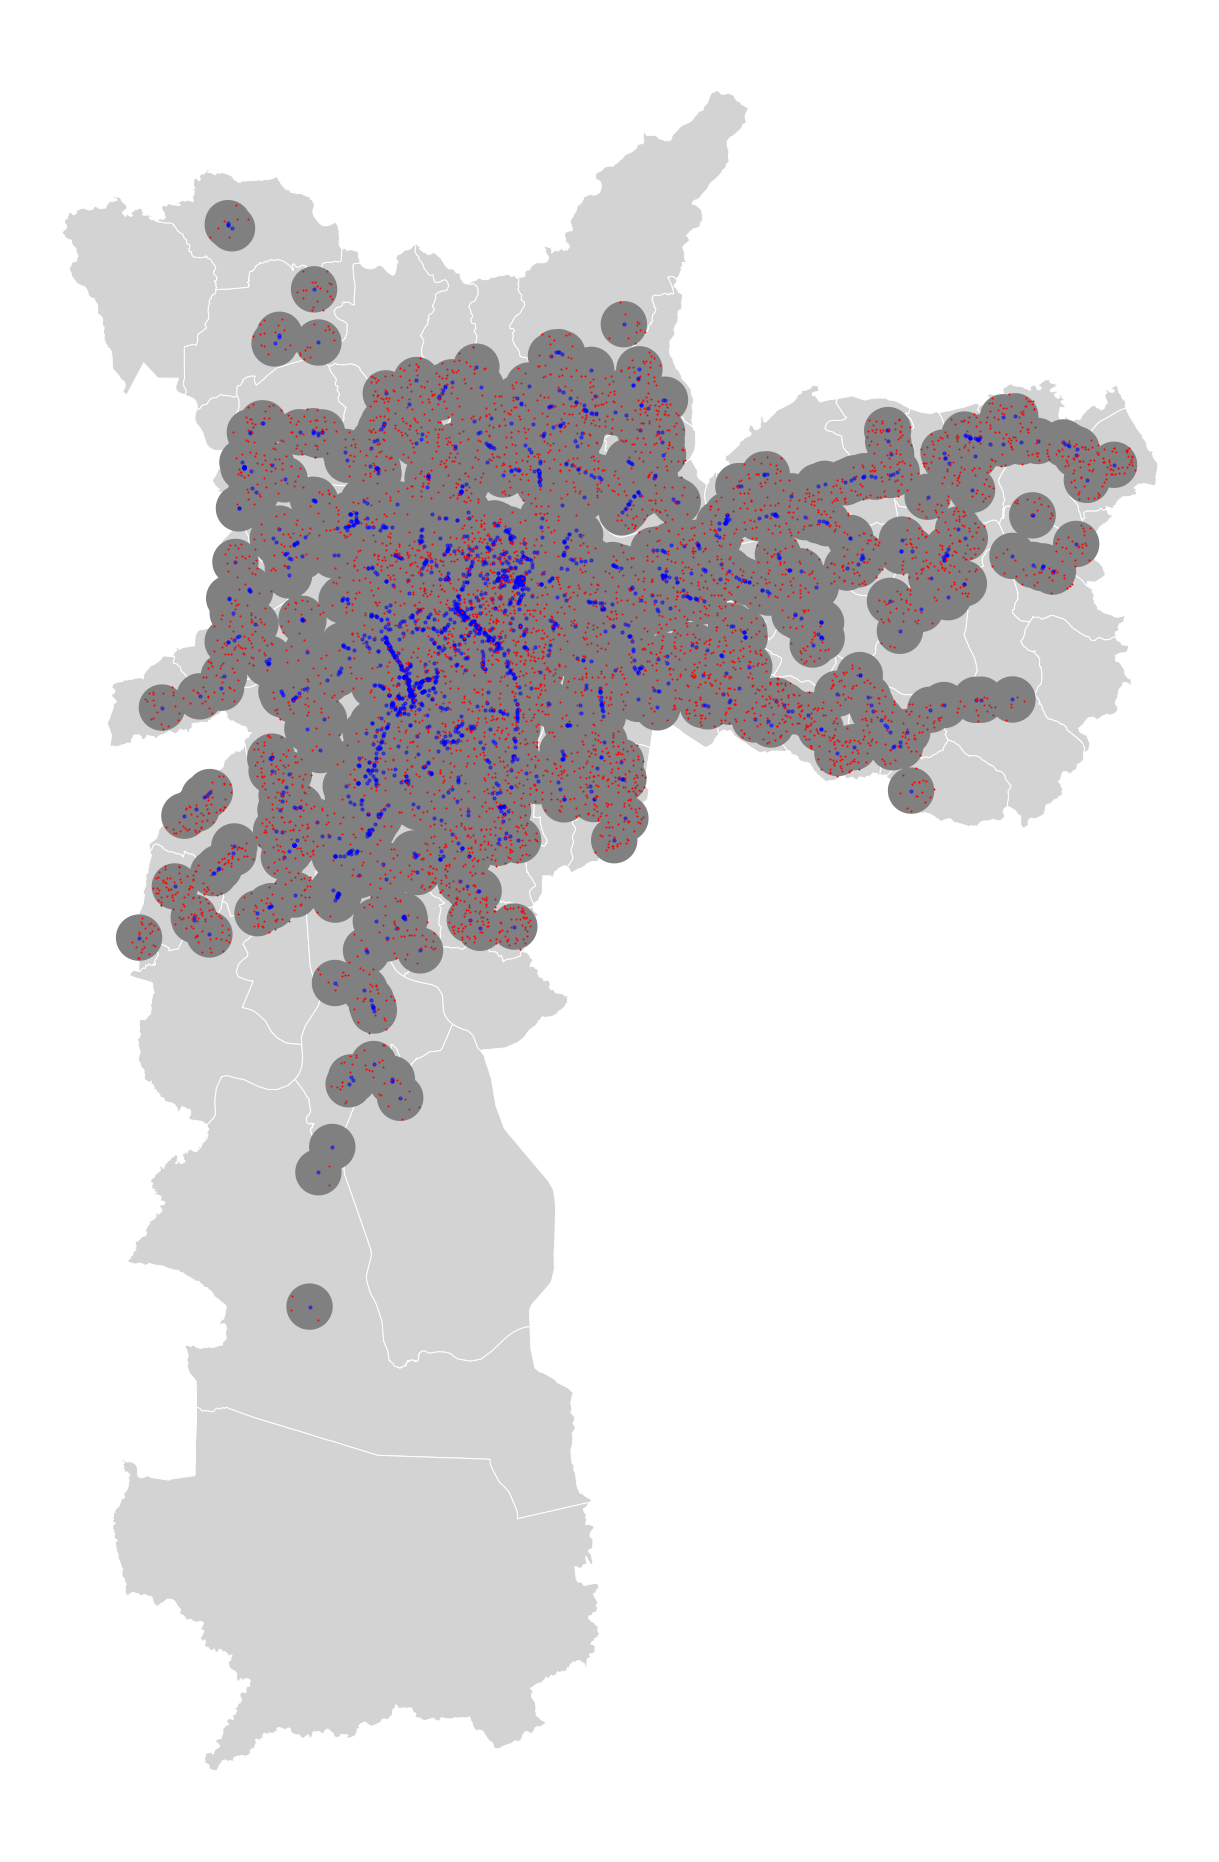

In [35]:
fig, ax = plt.subplots(figsize=(40,34))

# Set bg colors
ax.set(facecolor = "white")
fig.patch.set_facecolor('white')

# Plot polygons
sp_shp.plot(ax=ax, facecolor='lightgrey', edgecolor="white")
new.plot(ax=ax, facecolor='grey')

# Plot points
within_sp.plot(ax=ax, color='blue', markersize=10, alpha=0.5)
#within_sp.geometry.buffer(1000).plot(ax=ax, alpha=0.6, edgecolor='black', facecolor='none')
gdf_within.plot(ax=ax, color='red', markersize=1)

ax.axis("off")
plt.show()

In [30]:
teste = within_sp.geometry.buffer(1000).unary_union

<AxesSubplot:>

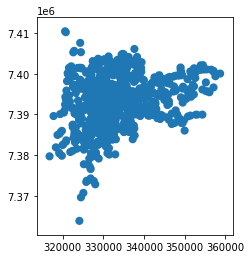

In [34]:
new = gpd.GeoDataFrame(crs=sp_shp.crs, geometry=[teste])
new.plot()